# Tema: **Impacto del COVID-19 en el sector laboral costarricences.

## Identificación del problema

La pandemia de COVID-19 generó suspensiones, reducciones de jornada laboral y desempleo e inactividad, ya sea por incompatibilidad del trabajo desempeñado con la modalidad de teletrabajo, recortes administrativos o por falta de herramientas tecnológicas. Asimismo, las personas que lograron mantenerse laborando durante este periodo vieron un cambio en la calidad de su empleo, debido al aumento de los costos fijos que las medidas sanitarias que las autoridades obligaron a implementar se vieron reflejados en los costos fijos de las eempresas y en reducción de la oferta laboral (esto implicaba una mayor carga laboral para los empleados que permanecieron en las empresas), una menor capacidad utilizada.

Muchos sectores se vieron afectados de manera más inmediata y persistente son los servicios de alojamiento, esparcimiento, comercio, transporte, y aquellos sectores mayormente dependientes del turismo local y foráneo. Por otra parte, el comercio electrónico y los servicios de telecomunicaciones y tecnologías de la información, así como la venta de productos farmacéuticos se vieron favorecidos por el aumento de la demanda de sus productos y servicios. 

El gobierno otorgo la facilidad de retirar el FCL (fondo de capitalización laboral) a aquellos funcionarios que le redujeran o suspendieran su jornada laboral. Los que quedaron desempleados ya tenían ese derecho porque este fondo es un auxilio de cesantía. Por medio de este trámite se tratará de darle seguimieno a la situación laboral de esta población, que en teoría, sería la población economicamente activa.

## Objetivo

> Analizar la afectación de la situación laboral durante lo vivido con la pandemia hasta la fecha.

> Identificar los sectores más afectados, de acuerdo a los retiros de FCL y despidos o suspenciones.

> Identificar la recuperación recuperada en el sector laboral.

> Indagar si el tema referente al COVID, fcl y restricciones, realmente fue percibido como un problema por la población costarricense, así como el tipo de sentimientos experimentados en la difusión de las noticias. Este es un breve estuduio cuya finalidad es didactica para entender el funcionamiento del webscraping.


## Preguntas de investigación
*	¿En que sectores permanecieron las personas que no fueron despedidas o que recperaron su ocupación durante la pandemia de COVID-19? 
*	¿Cuales fueron los sectores más afectados? 
*   ¿A que sectores regresaron los trabajadores de los sectores más afectados? 
*	¿Qué parte de la estructura productiva fue la más golpeada: micros, pequeñas, medianas o grandes empresas?
*   ¿En qué meses o fechas exactas existieron un mayor número de noticias referentes al covid, FCL y jornada laboral?
*   ¿Cuál fue el sentimiento que predomino en la redacción de las notas periodisticas y si fueron sustentadas con hechos o meramente opiones?

#  Analisis de comportamiento laboral por COVID
### Se va a predecir...

Los empleados de Costa Rica en época de pandemia se vieron obligados a reducir su lornada laboral o bien ser suspendidos temporalmente. En casos peores fueron despedidos.

Los trabajadores son la fuerza laboral de un país y son los que sostienen la economía. ¿Qué pasa si estos trabajadores no logran recuperar sus trabajos o sus ingresos, cómo se verá afectado el país? Por lo tanto, la tasa de desempleo o subempleo es una de las métricas más importantes para mostrar la economía del país.

La tasa de salida del trabajador por concepto de COVID es un KPI para comprender lo que esta pasando. Esta tasa representa el porcentaje de trabajadores que quedaron desempleado o subempleados por la pandemia.

Se tratará de identificar cual es la tasa de recuperación posible con base en las variable obtenidas. 

## Tabla de contenido
### 1) Introducción

> * Dataset, caracteristicas(features) y objetivo(target value)
> * Descripción del problema

### 2) Análisis descriptivo y EDA (Análisis de datos exploratorios)

> * Desempleado y correlación entre (variables)features
> * Perfil de los trabajadores desempleados
> * Distribución salarial anterior y nueva --Tenure and Monthly charges distribution

### 3) Analisis de Clusters

> * Detección de clústeres de desempleado
> * Análisis de clústeres de desempleados: por datos demográficos, edad y estado civil, y si se consiguiera por sector y zona geografica

### 4) Modelo de predicción de desempleados

> * Proceso de modelo de predicción 
> * Evaluación del modelo

In [62]:
__author__ = "Eduardo Oreamuno"
__email__ = "eoaparicio@yahoo.com"

### 1. Introduction

Conjunto de datos (dataset) , características (features) y valor objetivo (target value)
Source : Superintendencia de Pensiones

La SUPEN proporcionó datos anonimos de los trabajadores para la industria de pensiones para predecir la pérdida de empleos por COVID en función de la información demográfica, y otros datos. El objetivo principal aquí es analizar el comportamiento de los desempleados y predecir el comportamiento que podría tener en un futuro.

La información tiene información relacionada a,

Demográfico:
* Género: Masculino - Femenino - Desconocido
* Rango de edad:
* Pensionado

Salarial
   * Salario final tras COVID
   * Salario nuevo post COVID
   * Si tuvo reducción
   * Si se pensionó
    
Se esta tratando de obtener información de patronos, para poder proporcionarle más caracteristicas al estudio, como el sector o la zona geografica.

Objetivo:
* Desempleado - ¿Si el trabajador recuperará o no el trabajo?

### Descripción del problema

* ¿Por qué a los trabajadores los desemplean? 
Las razones por las que despiden al trabajador pueden ser 

>    * Altos Salarios
>    * Pocos ingresos **No tenemos esto para evaluarlo.**
>    * Sectores afectado **Con la de patronos se podrá obtener.**
>    * Zonas geofráficas
>    * Grupos etarios 
>    * Otras razones
    
* ¿Cómo detectar al trabajador despedido?

>    * Monitoreo
>    * Seguimiento salarial 
>    * Seguimiento de aportes


### 2. Análisis descriptivo y EDA (Análisis de datos exploratorios)

Aquí, se han explorado datos, características y para tratar de tener algo de intuición sobre ellos.

### Cargar bibliotecas(libraries) y conjunto de datos (dataset)

In [63]:
import pandas as pd
import numpy as np
import math as math
import random
from sklearn.utils import shuffle
import sklearn.preprocessing  as prepro
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.utils import resample
from sklearn.cluster import KMeans
from imblearn.over_sampling import SMOTE
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.lines as mlines
from adjustText import adjust_text

#constantes
random_state = 42
plotColor = ['c','palegreen','salmon','plum','aquamarine', 'y','tan','peru']
#markers = ['+','o','*','^','v','>','<','-','#']
markers = ['P','H','*','^','v','>','<','D','s']

#set up
sns.set(style='whitegrid')
%matplotlib inline

In [64]:
# Create Data class which has load_data method
class Data:
    def __init__(self):
        print("Data object initiated")
    
    def Load_data(self,filepath,format='csv'):
        """ Read data from file and return data """
        if format == 'csv':
            return pd.read_csv(filepath, encoding = 'utf8', sep=";")
        elif format == 'xlsx':
            return pd.read_excel(filepath)

In [65]:
data_file = 'Prueba1.csv'
extension = 'csv'

data = Data()
df_raw = data.Load_data(data_file, extension)


Data object initiated


### Dimensionalidad & comprobación de estado

In [66]:
df_raw.shape

(463769, 23)

In [67]:
df_raw.head().T

,0,1,2,3,4
numero afiliado,19,27,217,227,286
fecha,31/5/2020,31/5/2020,31/3/2021,31/8/2020,28/2/2021
edad,86,85,77,76,75
RangoEdad,entre59y100,entre59y100,entre59y100,entre59y100,entre59y100
genero,M,F,M,F,F
estado civil,2,4,1,2,1
Est Civ,CSD,VID,SLT,CSD,SLT
salario,935700,538592,0,0,0
Rango Salario,3,2,0,0,0
Hay Aportes,10,1,0,0,0


### Se identificaran valores extraños

* Salarios menores iguales a 0
* Edad mayor a 100 para trabajadores activos, los cuales se espera que vengan en el set de datos

In [68]:
print(df_raw['salario'].count())
print('Salarios menores a 0 : ',df_raw[df_raw.salario<0].shape[0])
print('Salarios iguales a 0 : ', df_raw[df_raw.salario==0].shape[0])
print('Empleados activos con edades superiores a 100 : ',df_raw[df_raw.edad>100].shape[0])

463769
Salarios menores a 0 :  15
Salarios iguales a 0 :  17117
Empleados activos con edades superiores a 100 :  18


In [69]:
# Se descartan filas y columnas innecesarias
X = df_raw.copy()
# Se necesitan edad, salarios edad, 'salario''SalarioPromedioRetorno', 'fecha'
X.drop(['numero afiliado','estado civil','Mes Retorno','Ultimo Aporte'], axis=1, inplace=True)
X.drop(['Reduccion', '% Reduccion','Fecha Corte'], axis=1, inplace=True)

# Limpiamos datos de salarios y edad extraños
# Se borran 18 registros con edades > 100 se asumen como anomalias.
X = X.drop(X[X['edad']>100].index)

# Se borra salario menor o igual que 0
# Se borran salarios menores o iguales 0 porque son personas desempleadas desde hace mucho tiempo que aprovecharon para retirar.
# Son 17117 y 15 salario < a 00 anomalias.
X = X.drop(X[X['salario']<=0].index)
X = X.reset_index(drop=True)

df_raw = X.copy()
df_raw.head(10)

,fecha,edad,RangoEdad,genero,Est Civ,salario,Rango Salario,Hay Aportes,Salario Promedio Retorno,Rango Salario Retorno,Diferencia brechas,Inactivo despues retiro,Inactivo despues de Ult. Aporte,pensionado,Tuvo reduccion,Desempleado
0,31/5/2020,86.0,entre59y100,M,CSD,935700.00,3.0,10.0,491243.33,2.0,1.0,0.0,0.0,1.0,1.0,0.0
1,31/5/2020,85.0,entre59y100,F,VID,538591.88,2.0,1.0,2431900.00,5.0,-3.0,0.0,0.0,1.0,0.0,0.0
2,31/10/2020,73.0,entre59y100,M,DVR,64908.00,1.0,0.0,NaN,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,30/6/2020,72.0,entre59y100,F,CSD,173100.00,1.0,1.0,11533.33,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,31/10/2020,71.0,entre59y100,F,SLT,61400.00,1.0,2.0,61400.00,1.0,0.0,0.0,2.0,0.0,0.0,1.0
5,30/4/2020,68.0,entre59y100,F,DVR,47570.76,1.0,0.0,NaN,0.0,1.0,0.0,0.0,1.0,0.0,0.0
6,31/8/2020,68.0,entre59y100,F,DVR,124814.05,1.0,0.0,NaN,0.0,1.0,0.0,0.0,1.0,0.0,0.0
7,31/3/2020,67.0,entre59y100,F,CSD,817299.77,2.0,0.0,NaN,0.0,2.0,0.0,0.0,1.0,0.0,0.0
8,31/10/2020,68.0,entre59y100,F,CSD,1026653.00,3.0,0.0,NaN,0.0,3.0,0.0,0.0,1.0,0.0,0.0
9,30/11/2020,67.0,entre59y100,F,SLT,429611.00,2.0,0.0,NaN,0.0,2.0,0.0,0.0,1.0,0.0,0.0


Dataset has **7043 observations** and **21 features**

In [70]:
df_raw.columns

Index(['fecha', 'edad', 'RangoEdad', 'genero', 'Est Civ', 'salario',
       'Rango Salario', 'Hay Aportes', 'Salario Promedio Retorno',
       'Rango Salario Retorno', 'Diferencia brechas',
       'Inactivo despues retiro', 'Inactivo despues de Ult. Aporte',
       'pensionado', 'Tuvo reduccion', 'Desempleado'],
      dtype='object')

In [71]:
# Chequeando valores nulos o extraños
df_raw.isnull().any()
#df_raw['Salario Promedio Retorno']

fecha                              False
edad                               False
RangoEdad                          False
genero                             False
Est Civ                            False
salario                            False
Rango Salario                      False
Hay Aportes                        False
Salario Promedio Retorno            True
Rango Salario Retorno              False
Diferencia brechas                 False
Inactivo despues retiro            False
Inactivo despues de Ult. Aporte    False
pensionado                         False
Tuvo reduccion                     False
Desempleado                        False
dtype: bool

In [72]:
#Sustituir valores nulos con 0
df_raw.fillna(0, inplace=True)

In [73]:
df_raw.head().T

,0,1,2,3,4
fecha,31/5/2020,31/5/2020,31/10/2020,30/6/2020,31/10/2020
edad,86,85,73,72,71
RangoEdad,entre59y100,entre59y100,entre59y100,entre59y100,entre59y100
genero,M,F,M,F,F
Est Civ,CSD,VID,DVR,CSD,SLT
salario,935700,538592,64908,173100,61400
Rango Salario,3,2,1,1,1
Hay Aportes,10,1,0,1,2
Salario Promedio Retorno,491243,2.4319e+06,0,11533.3,61400
Rango Salario Retorno,2,5,0,1,1


In [74]:
df_raw.rename(columns={'fecha':'Periodo'
                       ,'genero':'Genero'
                       ,'Est Civ':'EstadoCivil'
                       ,'Rango Salario':'RangoSalario'
                       ,'Hay Aportes':'HayAportes'
                       ,'Salario Promedio Retorno':'SalarioPromedioRetorno'
                       ,'salario':'Salario'
                       ,'Rango Salario Retorno':'RangoSalarioRetorno'
                       ,'Diferencia brechas':'Brecha'
                       ,'Tuvo reduccion':'TuvoReduccion'
                       ,'Inactivo despues retiro':'InactivoPostRetiro'
                       ,'Inactivo despues de Ult. Aporte':'InactivoPostUltAporte'
                       ,'pensionado':'Pensionado'
                      }
              ,inplace=True)

In [75]:
# Duplicate value check
df_raw.duplicated().any()

True

In [76]:
# Exploring data types of each feature
df_raw.dtypes

Periodo                    object
edad                      float64
RangoEdad                  object
Genero                     object
EstadoCivil                object
Salario                   float64
RangoSalario              float64
HayAportes                float64
SalarioPromedioRetorno    float64
RangoSalarioRetorno       float64
Brecha                    float64
InactivoPostRetiro        float64
InactivoPostUltAporte     float64
Pensionado                float64
TuvoReduccion             float64
Desempleado               float64
dtype: object

Necesitamos cambiar el nombre de las columnas al formato adecuado y debemos transformar columnas como RangoEdad, genero, etc., a un formato similar para análisis futuros. 

### Transformación y cambio de nombre de datos

Aquí, cambiaremos el nombre de algunas columnas y modificaremos los registros con el formato adecuado para su posterior análisis.

In [77]:
df_raw2=df_raw.copy()
df_raw['RangoSalario'] = df_raw.RangoSalario.map({0:'No',1:'<=Minimo',2:'0.32-0.85',3:'0.85-1.23',4:'1.23-2.17',5:'2.17-4.33',6:'>4.33'})
df_raw['RangoSalarioRetorno'] = df_raw.RangoSalarioRetorno.map({0:'No',1:'<=Minimo',2:'0.32-0.85',3:'0.85-1.23',4:'1.23-2.17',5:'2.17-4.33',6:'>4.33'})
df_raw['TuvoReduccion'] = df_raw.TuvoReduccion.map({1:'Si',0:'No'})
df_raw['Pensionado'] = df_raw.Pensionado.map({1:'Si',0:'No'})
df_raw['Desempleado'] = df_raw.Desempleado.map({1:'Si',0:'No'})

In [78]:
cat_cols = ["RangoEdad","Genero","EstadoCivil","RangoSalario","RangoSalarioRetorno","Pensionado","TuvoReduccion"]

num_cols = ["HayAportes","Brecha","InactivoPostUltAporte","InactivoPostRetiro"]

target_col = 'Desempleado'

# spliting categorical columns into Nominal and Binary columns

#nominal_cols = ["RangoEdad","Genero","EstadoCivil","RangoSalario","RangoSalarioRetorno","HayAportes",
#                 "Brecha","InactivoPostUltAporte","InactivoPostRetiro"]

nominal_cols = ["RangoEdad","Genero","EstadoCivil","RangoSalario","RangoSalarioRetorno"]

binary_cols = ["Pensionado","TuvoReduccion"]

monto_cols = ["Salario","SalarioPromedioRetorno"]

In [79]:
def Generate_bar_graph(x, y, x_title, y_title, chart_title,color=plotColor):
    """ Based on x and y value, generate bar graph """
    
    fig, ax = plt.subplots()
    ax.bar(range(len(x))
       , y
       , width = 0.75
       , color=color
        , alpha = 0.6) 

    # stopping alphabetical sorting of graph
    plt.xticks(range(len(x)),x)
    plt.title(chart_title, fontsize=14)
    plt.xlabel(x_title,fontsize=13)
    plt.ylabel(y_title,fontsize=13)
    plt.grid(b=False)
    plt.yticks(fontsize=0)
    plt.ylim(top=1)

    
    # Visible x - axis line
    for spine in plt.gca().spines.values():
        spine.set_visible(False) if spine.spine_type != 'bottom' else spine.set_visible(True)
    
    # Display label for each plot
    for i,v in (enumerate(y)):
        ax.text(i
                ,v+0.05
                ,str(round((v*100),2))+'%'
                ,fontsize=13
                ,ha='center')
    
    plt.show()

### Distribución de variables categóricas y binarias por objetivo

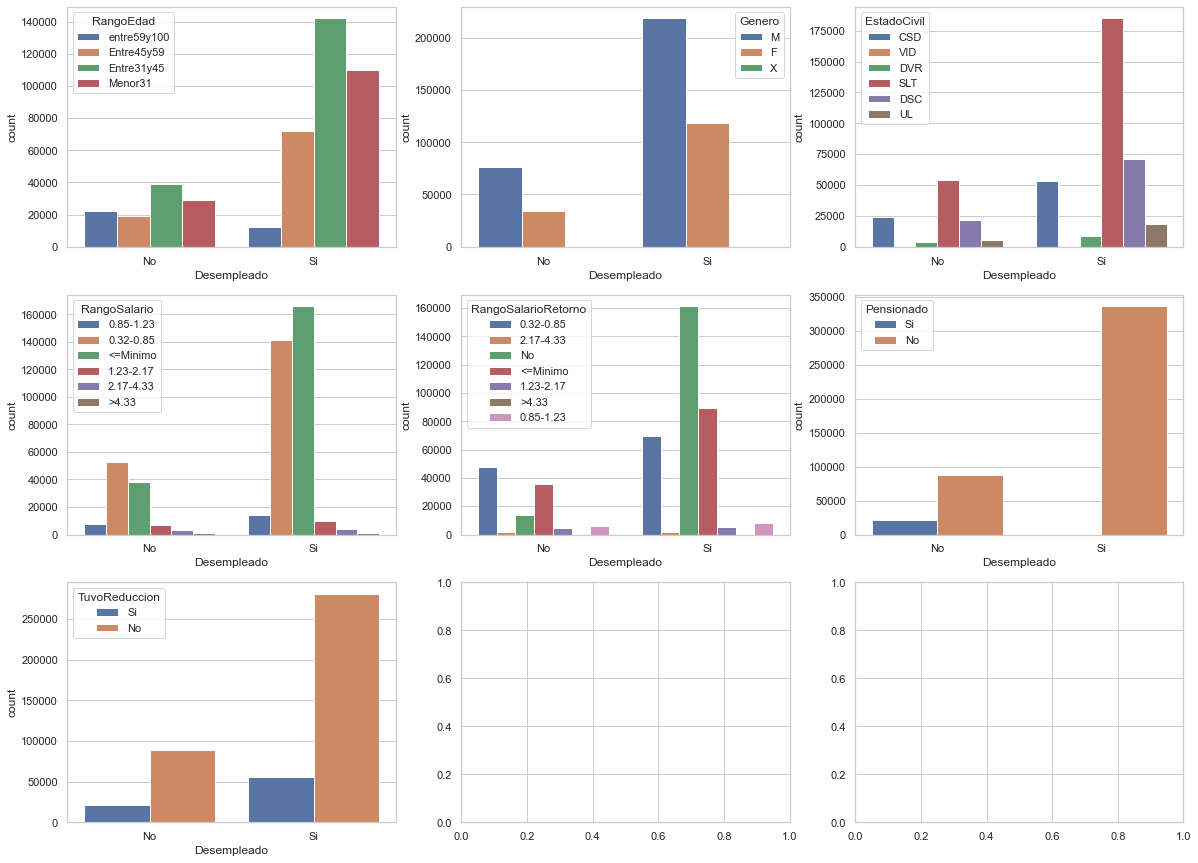

In [80]:
df_temp = df_raw.copy()
fig , ax = plt.subplots(3,3,figsize=(20,15))
sns.set(style="ticks", color_codes=True)
for axis,col in zip(ax.flat,cat_cols):
    sns.countplot(x=df_temp[target_col],hue=df_temp[col],ax=axis)
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
label_encoder=LabelEncoder()
for cols in cat_cols:
    df_temp.loc[:,cols] = LabelEncoder().fit_transform(df_temp.loc[:,cols])

**De los graficos de arriba se puede deducir que los desempleados or COVID**

> * La mayoria fueron mujeres y de igual froma la recuperación de empleo se dio en la misma proporción.
> * Los que retiraron y quedaron desempleados, la mayoria estuvieron entre 31 y 45, seguidos muy de cerca por los menores de 31, y luego lo de 45 a 59. 
> * Solteros y estado desconocidos fueron los mayores que retiraron y quedaron desempleados.
> * Un grupo de lo sque retiraron se pensionaron, o estaban pensionados.
> * Con respecto a la parte salarial, la mayoria de los identificados ganaban o reportaban menos del salario mínimo, segudo por el segmento que ganaba menos de 850 mil.
> * De los que regresaron a sus empleos o solo tuvieron reducción de jornada, muchos quedaron sin salario y un alto porcentaje quedo en la rama de ganar salario por menos del mínimo.
> * De los que tuvieron reducción o suspensión pocos quedan con trabajo.
> * Se muestra una parte de personas que se pensionaron. Para nuestro estudio no tiene valor por que la muestra es poco representativa y no es parte del alcance. Se eliminaran del dataset.


In [81]:
#print(df_raw.groupby(['RangoSalario','Genero']).count())

<AxesSubplot:xlabel='RangoSalario', ylabel='count'>

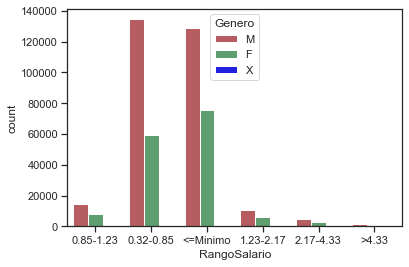

In [82]:
sns.countplot(data=df_raw, x='RangoSalario', hue='Genero', palette=['r','g','blue'])

Confirmando los graficos anteriores, se puede apreciar como los hombres fueron los principales afectados, y particularmente de este gráfico se puede deducir:

* El salario que más predominaba era el rango entre 320 mil y 850 mil. 
* Pero muy de cerca estaba el mínimo o menos.
* Es importante notar como en salario menores o iguales al mínimo las mujeres tenían una representación importante con respecto a los otros rangos.

<AxesSubplot:xlabel='RangoSalarioRetorno', ylabel='count'>

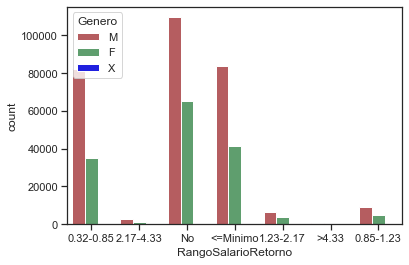

In [83]:
#sns.histplot(data=df_raw, x='Genero', hue='RangoSalarioRetorno')
sns.countplot(data=df_raw, x='RangoSalarioRetorno', hue='Genero', palette=['r','g','blue'])

En este gráfico podemos ver como se comportó la variable de salario de retorno, aunque esto no garantiza que sigan empleados.

* Un alto porcentaje tanto de hombres como mujeres no retornó a un empleo. 
* Otro grupo importante de personas retorno por un salario mínimo o inferior.


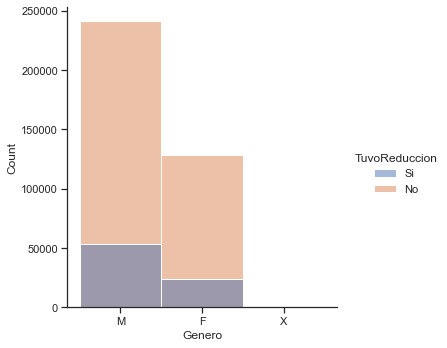

In [84]:
sns.displot(data=df_raw, x='Genero', hue='TuvoReduccion')

Se puede ver que hay casi el doble del tamaño de la muestra de hombres en comparación con las mujeres en el conjunto de datos. Esto no solo se aprecia en el gráfico anterior, sino tambien en el de desempleo por COVID. Si bien esto puede no afectar demasiado las predicciones, la distribución del ingreso sí puede hacerlo. Como se aprecia el porcentaje de hombres que ganan tienen salario inferiores al mínimo es mucho mayor que el porcentaje de hombres que ganan la misma cantidad. Además podemos ver, como el porcentaje de mujeres sin salario es muy similar al de los hombres. Lo que si se evidencia es que proporcionalmente mayor cantidad de mujeres quedo sin salario. 
Este será sin duda un factor significativo y debería ser una característica considerada en el modelo de predicción.

<AxesSubplot:xlabel='RangoSalario', ylabel='count'>

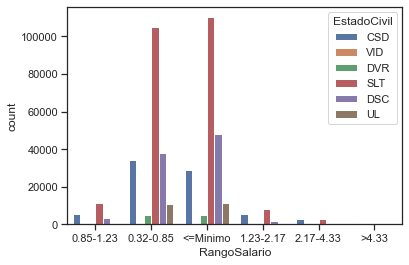

In [85]:
sns.countplot(data=df_raw, x='RangoSalario', hue='EstadoCivil')

<AxesSubplot:xlabel='RangoSalarioRetorno', ylabel='count'>

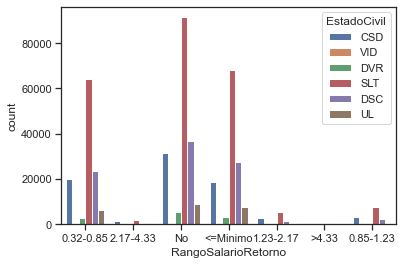

In [86]:
sns.countplot(data=df_raw, x='RangoSalarioRetorno', hue='EstadoCivil')

Text(0.5, 1.0, 'Distribución por edad')

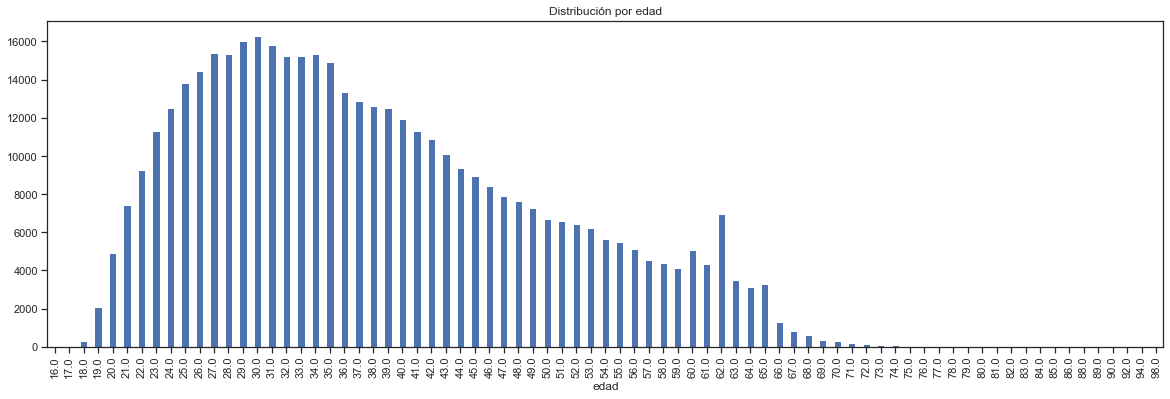

In [87]:
fig = plt.figure(figsize = (20,6))
GrupoEdad = df_temp.groupby(['edad']).size()
GrupoEdad.plot.bar()
plt.title("Distribución por edad")

La característica de edad describe la edad del individuo. Primero se muestra la distribución de edad de nuestro conjunto de datos. Las edades oscilan, mayormente, entre los 18 y los 72 años de edad, con la mayoría de las entradas entre las edades de 23 y 50 años.

In [88]:
# Se descartan la filas de pensionados ya que para el estudio no se requieren
X = df_raw.copy()
X = X.drop(X[X['Pensionado']=='Si'].index)
X = X.reset_index(drop=True)
df_raw = X.copy()
X = df_raw2.copy()
X = X.drop(X[X['Pensionado']==1].index)
X = X.reset_index(drop=True)
df_raw2 = X.copy()

Agrupamos los datos que necesitaremos en nuestro análisis.

### Realizaremos un analisis para ver el comportamiento por mes.

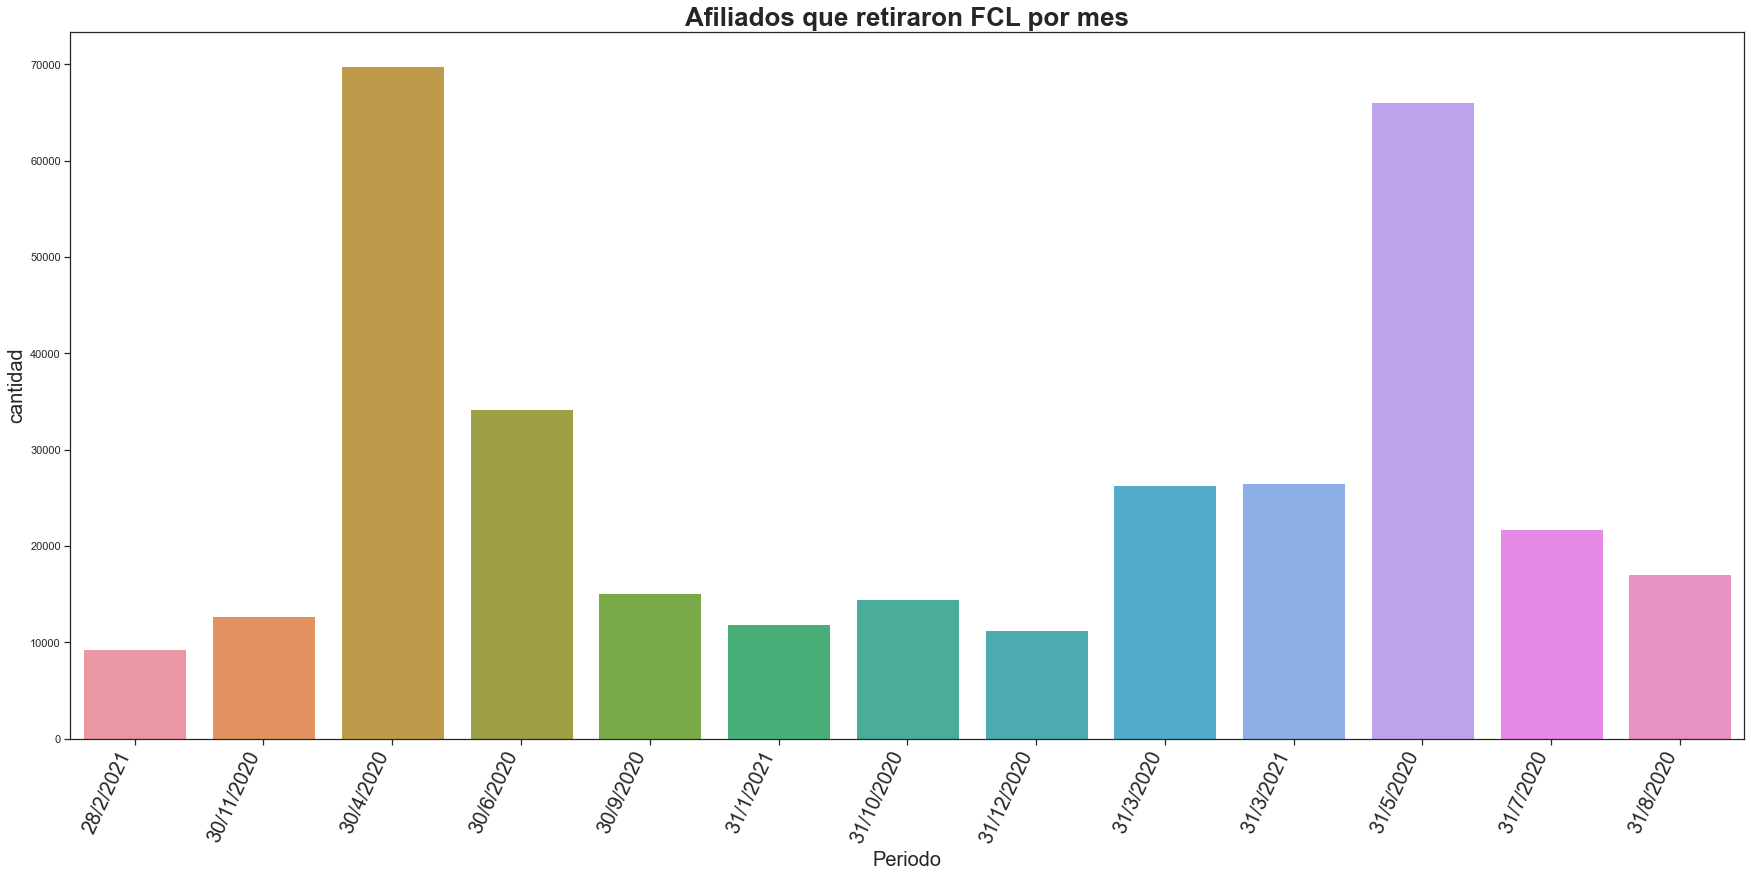

In [89]:
#df_raw2['Periodo'] = pd.to_datetime(df_raw2['Periodo']).apply(lambda x:x.strftime('%Y/%m'))
#print(df_raw2.groupby(['Periodo','Desempleado']).count())
df_desempleados = df_raw2[df_raw2['Desempleado'] == 1]
#df_desempleados
group1 = df_desempleados.groupby(by = ['Periodo'])['Desempleado']
data1 = group1.agg(['sum']).reset_index()
data1.rename(columns={'sum' : 'cantidad'},inplace=True)
fig,ax = plt.subplots(figsize = (30,13))
sns.barplot(x = "Periodo", y = "cantidad", data = data1)
ax.set_title('Afiliados que retiraron FCL por mes')
ax.title.set_fontsize(26)
ax.title.set_fontweight('bold')
#ax.set_yticklabels(data1.cantidad, fontsize = 20)
ax.set_xticklabels(data1.Periodo, rotation= 65, horizontalalignment = 'right',fontsize = 20)
ax.xaxis.label.set_fontsize(20)
ax.yaxis.label.set_fontsize(20)

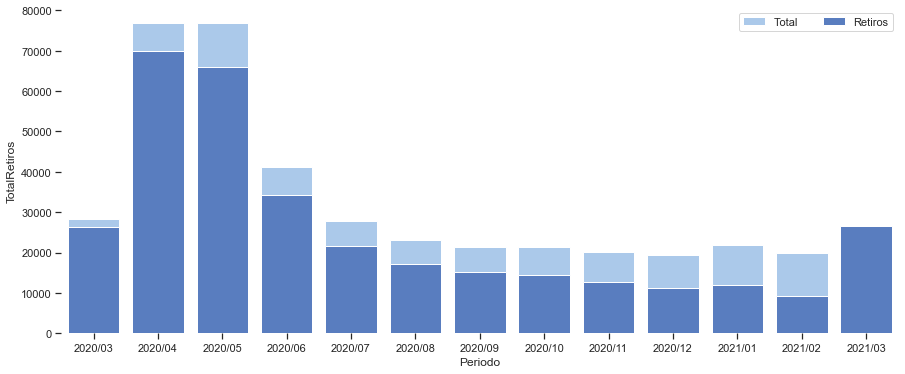

In [92]:
result11 = df_raw2.groupby(["Periodo", "Desempleado"])["Desempleado"].count().reset_index(name="TotalRetiros")
#print(result11)
result11 = result11[result11.Desempleado == 1]
result11['Periodo'] = pd.to_datetime(result11['Periodo']).apply(lambda x:x.strftime('%Y/%m'))
result12 = df_raw2.groupby(["Periodo"])["Periodo"].count().reset_index(name="TotalAfiliados")
result12['Periodo'] = pd.to_datetime(result12['Periodo']).apply(lambda x:x.strftime('%Y/%m'))
#print(result12)
result13 = pd.merge(result11,result12,left_on='Periodo', right_on='Periodo')
result13.sort_values(by=['Periodo'], inplace=True)
#print(result13)
f, ax = plt.subplots(figsize = (15,6))
sns.set_color_codes('pastel')
sns.barplot(y = 'TotalAfiliados', x = 'Periodo', data = result13, label = 'Total ', color = 'b', edgecolor = 'w')
sns.set_color_codes('muted')
sns.barplot(y = 'TotalRetiros', x = 'Periodo', data = result13, label = 'Retiros', color = 'b', edgecolor = 'w')
ax.legend(ncol = 2, loc = 'upper right')
sns.despine(left = True, bottom = True)
plt.show()

Se aprecia que los picos e retiros se dieron al inicio de la pandemia, entre abril y mayo, luego ha venido a la baja. sin embargo, se nota un repunte en marzo de este año.

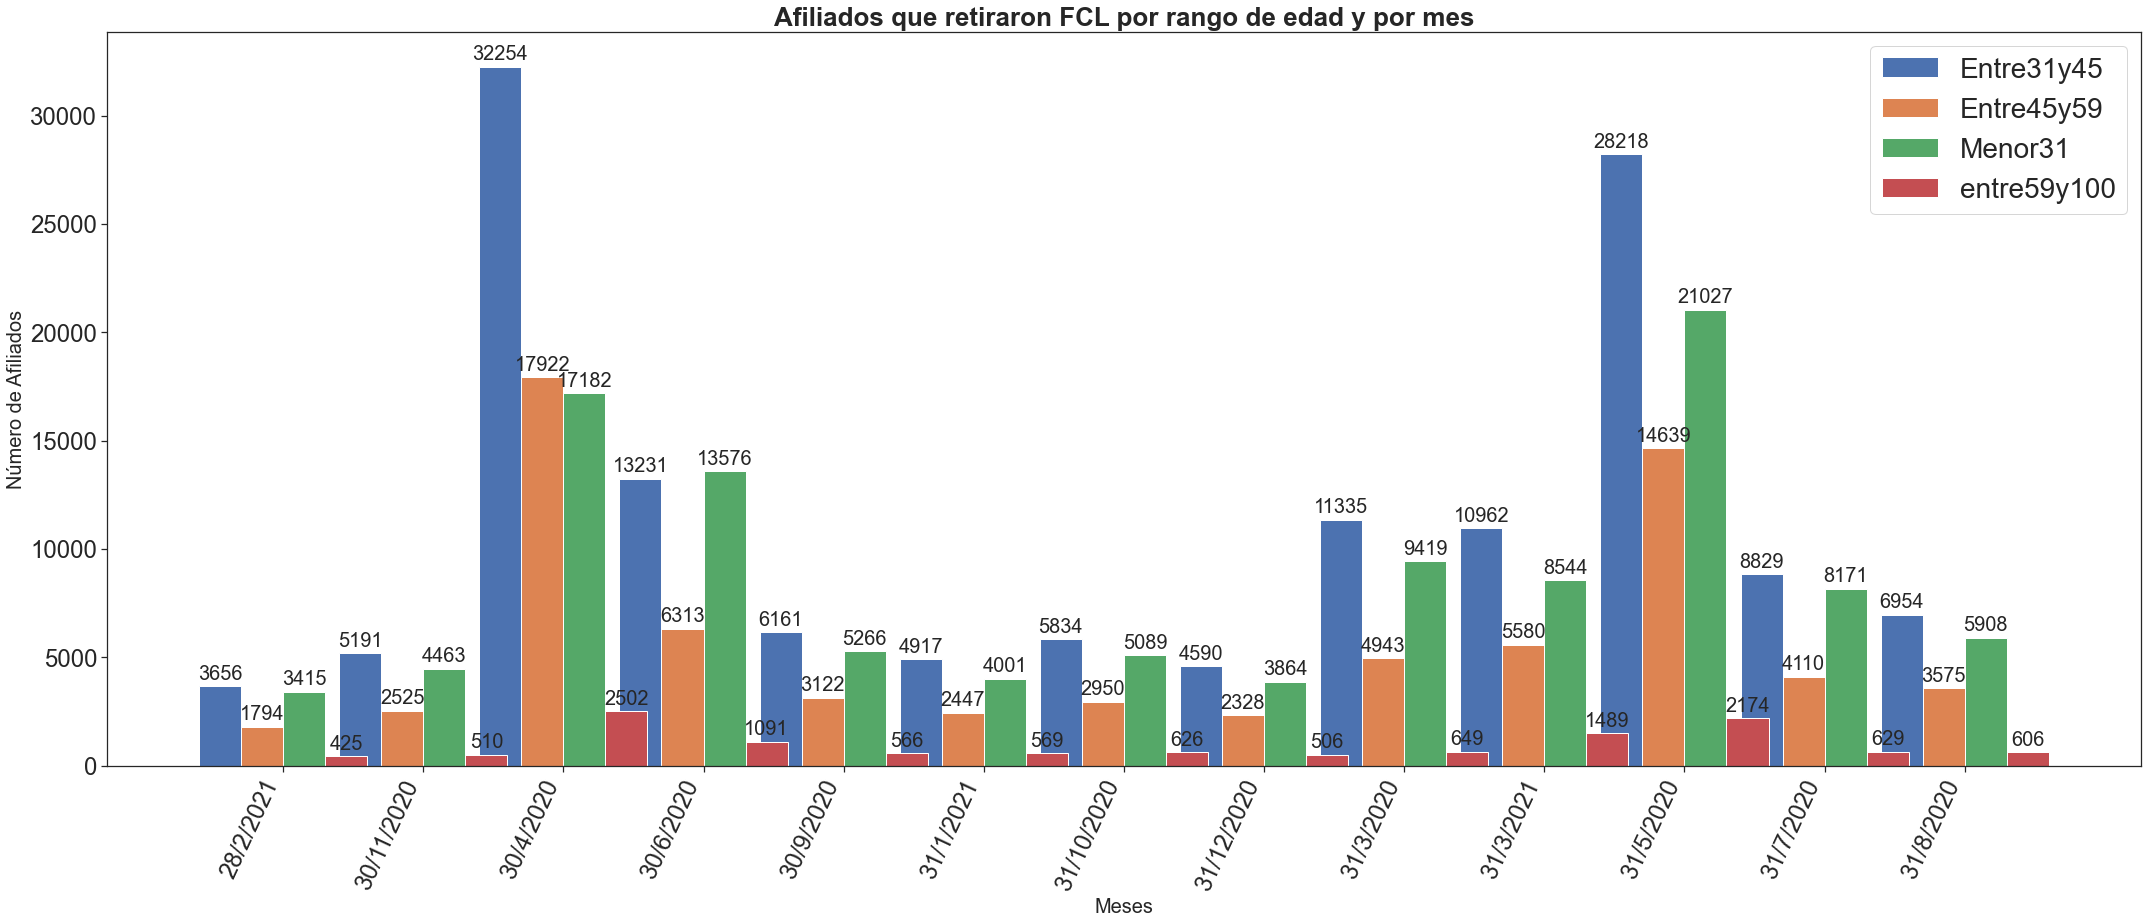

In [32]:
#df_raw2['Periodo'] = pd.to_datetime(df_raw2['Periodo']).apply(lambda x:x.strftime('%Y/%m'))
group1 = df_raw2.groupby(by = ['Periodo','RangoEdad'])['Desempleado']
data1 = group1.agg(['sum']).reset_index()
data1.rename(columns={'sum' : 'cantidad'},inplace=True)

fig,ax = plt.subplots(figsize = (30,13))

periodos = list(data1['Periodo'].drop_duplicates())

x = np.arange(len(periodos))
width = 0.3

RangoEdades = list(data1['RangoEdad'].drop_duplicates())
l = len(RangoEdades)

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom',fontsize = 20)

for i in range(l):
  pos = -(l+1)/2 + i+1
  rect = ax.bar(x + pos*width,data1[data1['RangoEdad'] == RangoEdades[i]].cantidad.astype(int),width)
  autolabel(rect)

ax.set_xticks(x)
ax.set_xticklabels(periodos, rotation= 65, horizontalalignment = 'right')

ax.set_title('Afiliados que retiraron FCL por rango de edad y por mes')
ax.title.set_fontsize(26)
ax.title.set_fontweight('bold')
ax.set_xlabel('Meses')
ax.xaxis.label.set_fontsize(20)
ax.set_ylabel('Número de Afiliados')
ax.yaxis.label.set_fontsize(20)

ax.legend(labels = RangoEdades,fontsize = 28,loc = 1)

ax.tick_params(axis='both', which='major', labelsize=24)
#ax.set_xticklabels(periodos, rotation= 65, horizontalalignment = 'right')

df_temp = fig.tight_layout()

#### Analisis entre rango de edad y mes.

Este gráfico nos muestra como en todos los meses la mayoria de afectados siempre han estado entre el rango de 31 y 45 y luego por los menores de 31 años. Y ahora en el mes de marzo se presenta una nueva escalada en los desempleados.

In [33]:
df_temp = df_raw2.copy()
df_temp['RangoSalario'] = df_temp.RangoSalario.map({0:'No',1:'Sub',2:'0.32-0.85',3:'0.85-1.23',4:'1.23-2.17',5:'2.17-4.33',6:'>4.33'})
df_temp['RangoSalarioRetorno'] = df_temp.RangoSalarioRetorno.map({0:'No',1:'Sub',2:'0.32-0.85',3:'0.85-1.23',4:'1.23-2.17',5:'2.17-4.33',6:'>4.33'})

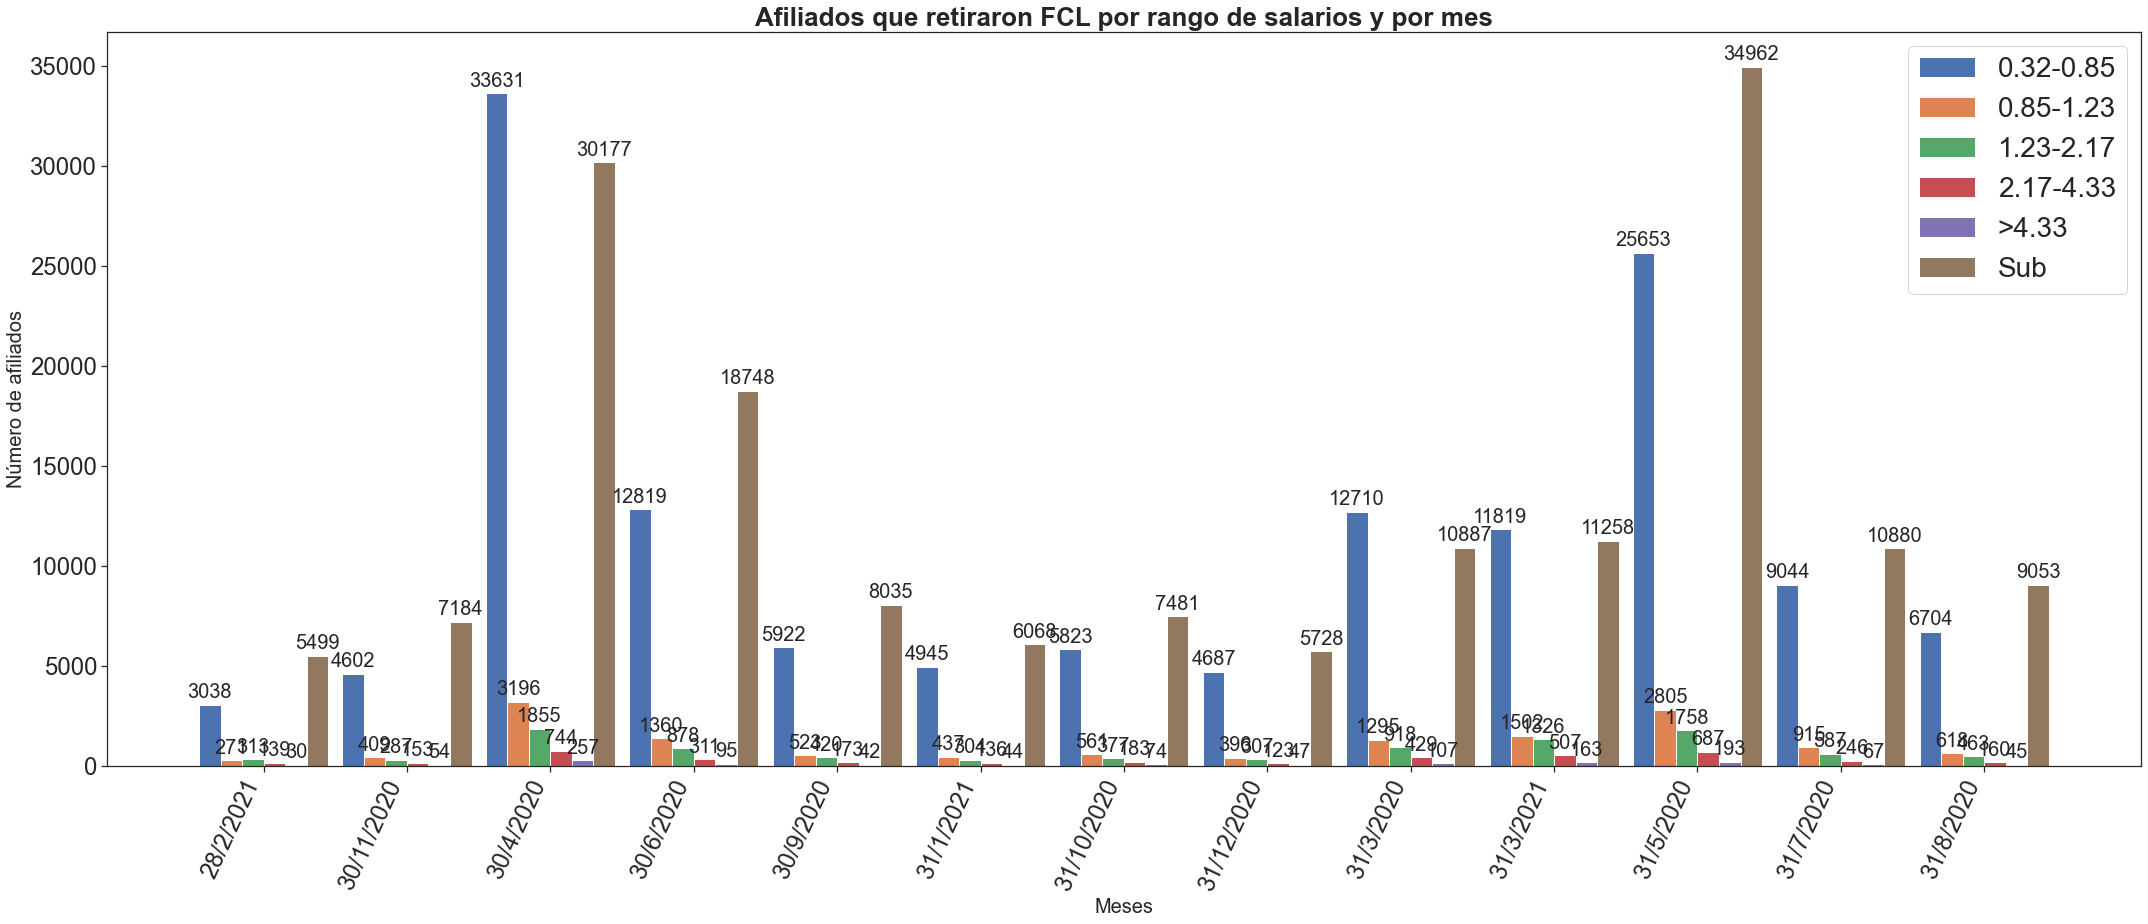

In [34]:
group1 = df_temp.groupby(by = ['Periodo','RangoSalario'])['Desempleado']
data1 = group1.agg(['sum']).reset_index()
data1.rename(columns={'sum' : 'cantidad'},inplace=True)

fig,ax = plt.subplots(figsize = (30,13))

periodos = list(data1['Periodo'].drop_duplicates())

x = np.arange(len(periodos))
width = 0.15

RangoSalarios = list(data1['RangoSalario'].drop_duplicates())
l = len(RangoSalarios)
for i in range(l):
    pos = -(l+1)/2 + i+1
    #print(x + pos*width,data1[data1['RangoSalario'] == RangoSalarios[i]].cantidad.astype(int),width)
    rect = ax.bar(x + pos*width,data1[data1['RangoSalario'] == RangoSalarios[i]].cantidad.astype(int),width)
    autolabel(rect)

ax.set_xticks(x)
ax.set_xticklabels(periodos, rotation= 65, horizontalalignment = 'right')

ax.set_title('Afiliados que retiraron FCL por rango de salarios y por mes')
ax.title.set_fontsize(26)
ax.title.set_fontweight('bold')
ax.set_xlabel('Meses')
ax.xaxis.label.set_fontsize(20)
ax.set_ylabel('Número de afiliados')
ax.yaxis.label.set_fontsize(20)

ax.legend(labels = RangoSalarios,fontsize = 28,loc = 1)

ax.tick_params(axis='both', which='major', labelsize=24)

fig.tight_layout()

#### Analisis entre rango de salario y mes.

Este gráfico muestra como durante todos los meses predominado los salarios inferioresa los 850000, como principales afectados.

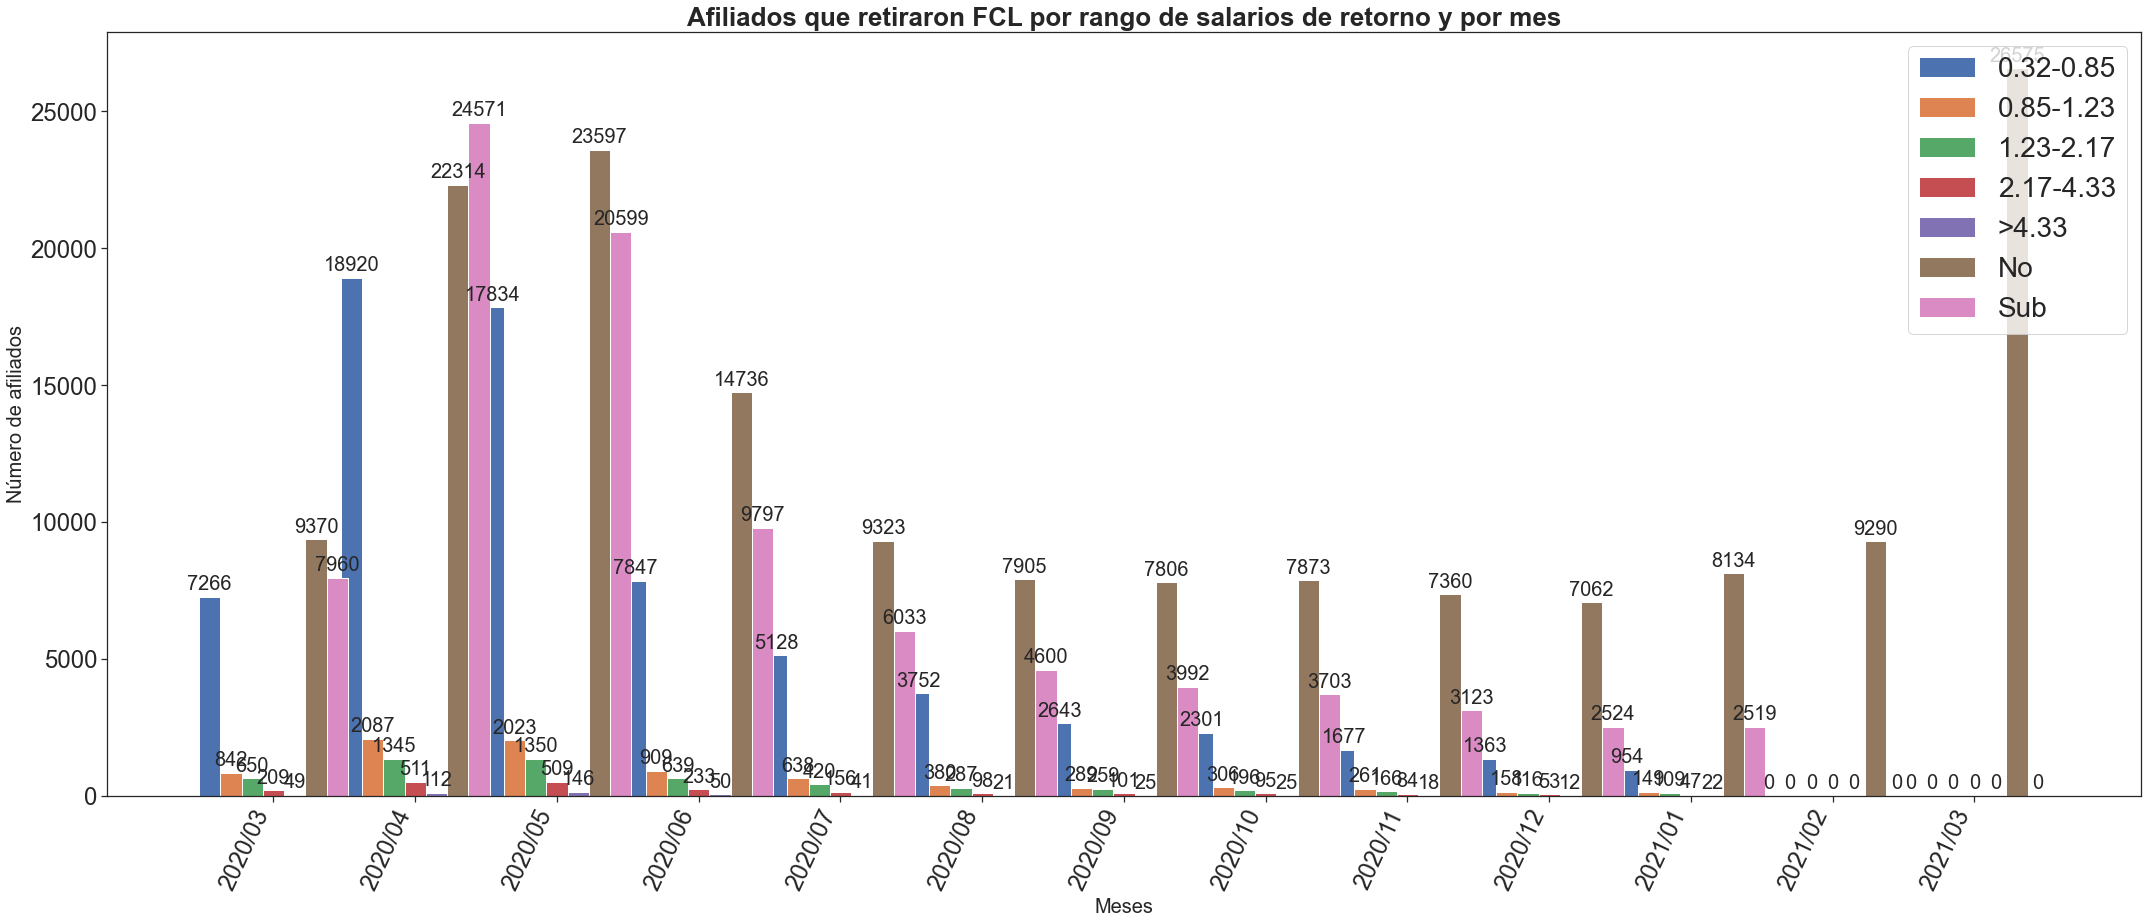

In [43]:
df_temp['Periodo'] = pd.to_datetime(df_temp['Periodo']).apply(lambda x:x.strftime('%Y/%m'))
group1 = df_temp.groupby(by = ['Periodo','RangoSalarioRetorno'])['Desempleado']
data1 = group1.agg(['sum']).reset_index()
data1.rename(columns={'sum' : 'cantidad'},inplace=True)
new_row = {'Periodo':'2021/03', 'RangoSalarioRetorno':'Sub', 'cantidad':0}
data1 = data1.append(new_row, ignore_index=True)
new_row = {'Periodo':'2021/03', 'RangoSalarioRetorno':'0.32-0.85', 'cantidad':0}
data1 = data1.append(new_row, ignore_index=True)
new_row = {'Periodo':'2021/03', 'RangoSalarioRetorno':'0.85-1.23', 'cantidad':0}
data1 = data1.append(new_row, ignore_index=True)
new_row = {'Periodo':'2021/03', 'RangoSalarioRetorno':'1.23-2.17', 'cantidad':0}
data1 = data1.append(new_row, ignore_index=True)
new_row = {'Periodo':'2021/03', 'RangoSalarioRetorno':'2.17-4.33', 'cantidad':0}
data1 = data1.append(new_row, ignore_index=True)
new_row = {'Periodo':'2021/03', 'RangoSalarioRetorno':'>4.33', 'cantidad':0}
data1 = data1.append(new_row, ignore_index=True)
#print(data1)
fig,ax = plt.subplots(figsize = (30,13))

periodos = list(data1['Periodo'].drop_duplicates())
x = np.arange(len(periodos))
width = 0.15

RangoSalariosRetorno = list(data1['RangoSalarioRetorno'].drop_duplicates())
l = len(RangoSalariosRetorno)
#print(range(l))
for i in range(l):
    #print(i,RangoSalariosRetorno[i])
    #print(data1[data1['RangoSalarioRetorno'] == RangoSalariosRetorno[i]].cantidad)
    pos = -(l+1)/2 + i+1
    #print(x + pos*width,data1[data1['RangoSalario'] == RangoSalarios[i]].cantidad.astype(int),width)
    rect = ax.bar(x + pos*width,data1[data1['RangoSalarioRetorno'] == RangoSalariosRetorno[i]].cantidad.astype(int),width)
    autolabel(rect)

ax.set_xticks(x)
ax.set_xticklabels(periodos, rotation= 65, horizontalalignment = 'right')

ax.set_title('Afiliados que retiraron FCL por rango de salarios de retorno y por mes')
ax.title.set_fontsize(26)
ax.title.set_fontweight('bold')
ax.set_xlabel('Meses')
ax.xaxis.label.set_fontsize(20)
ax.set_ylabel('Número de afiliados')
ax.yaxis.label.set_fontsize(20)

ax.legend(labels = RangoSalariosRetorno,fontsize = 28,loc = 1)

ax.tick_params(axis='both', which='major', labelsize=24)

fig.tight_layout()

## No estoy seguro de interpretarlo bien

In [44]:
# Grafico de cambios salariales.
def Distribucion_Numerica(df_cal1,feature):
    """ Distribution de la variable numerica basado en la fuente"""
    fig = plt.figure(figsize=(15,4))
    
    plt.subplot(1,2,1)
    ax = sns.kdeplot(df_cal1[feature]
                     , color = 'g'
                     , shade = True)
    
    title_str = "Distribución original " +feature 
    plt.title(title_str)
    
    plt.subplot(1,2,2)
    ax = sns.kdeplot(df_cal1.loc[(df_cal1[target_col]=="Si"),feature]
                     , color = 'r'
                     , shade = True
                     , label='Desempleado', legend = True)
    ax = sns.kdeplot(df_cal1.loc[(df_cal1[target_col]=="No"),feature]
                     , color = 'b'
                     , shade = True
                     , label='No', legend = True)
    
    title_str = feature + " Distribución: Desempleado o no"
    plt.title(title_str)
    plt.legend()
    plt.show()

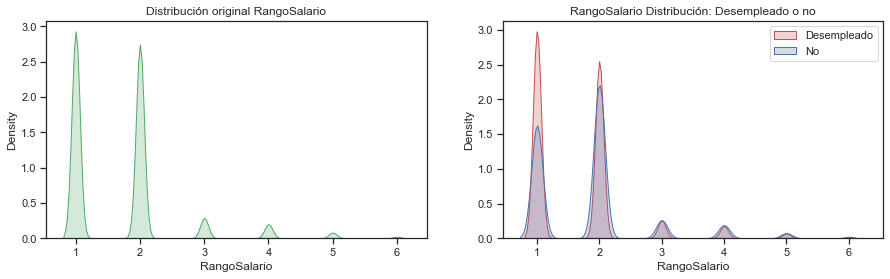

In [45]:
df_raw2['Desempleado'] = df_raw2.Desempleado.map({1:'Si',0:'No'})
Distribucion_Numerica(df_raw2,'RangoSalario')

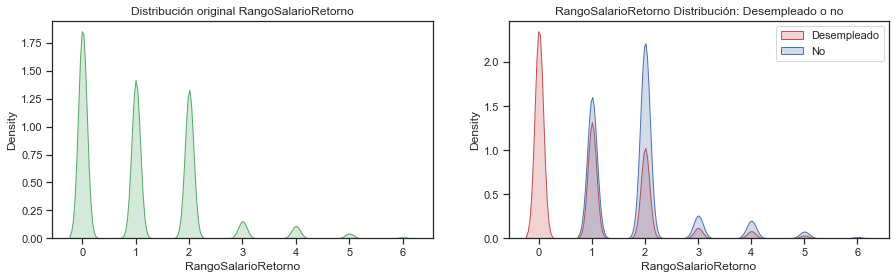

In [46]:
Distribucion_Numerica(df_raw2,'RangoSalarioRetorno')

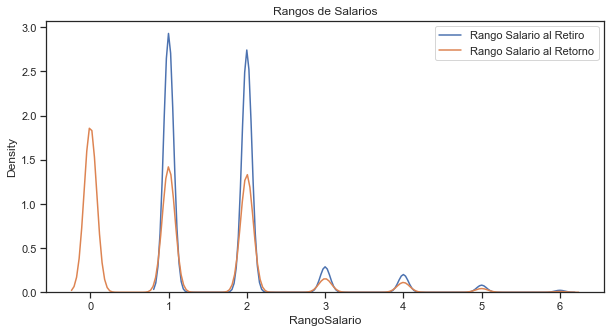

In [47]:
fig, (ax1) = plt.subplots(figsize=(10, 5))

ax1.set_title('Rangos de Salarios')
sns.kdeplot(df_raw2['RangoSalario'], ax=ax1, label='Rango Salario al Retiro')
sns.kdeplot(df_raw2['RangoSalarioRetorno'], ax=ax1, label='Rango Salario al Retorno')
plt.legend()
plt.show()

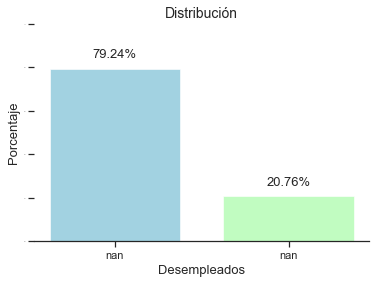

Si    0.792362
No    0.207638
Name: Desempleado, dtype: float64


In [48]:
# Balance de la variable de salida
#print(df_raw2.groupby(target_col).size() / len(df_raw2))
#sns.catplot(data=df_raw2,y=target_col, kind = 'count',height=2.6, aspect=1.5)

Tasa_Desempleado = df_raw2[target_col].value_counts() / df_raw2.shape[0]

Generate_bar_graph(Tasa_Desempleado.index.map({0:'No',1:"Si"})
                   , Tasa_Desempleado.values
                   , 'Desempleados'
                   , 'Porcentaje'
                   , 'Distribución')

print(Tasa_Desempleado)


### EDA (bivariante)

In [49]:
# se importa para evaluar la variables categoricas no ordinales-
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.stats.multicomp as multi

In [53]:
df_temp.head(10).T

,0,1,2,3,4,5,6,7,8,9
Periodo,2020/10,2020/05,2020/06,2020/08,2020/10,2021/02,2021/03,2020/04,2021/01,2021/02
edad,71,64,64,63,63,63,63,61,62,62
RangoEdad,entre59y100,entre59y100,entre59y100,entre59y100,entre59y100,entre59y100,entre59y100,entre59y100,entre59y100,entre59y100
Genero,F,F,F,F,F,F,F,F,M,M
EstadoCivil,SLT,VID,VID,CSD,CSD,CSD,CSD,CSD,DVR,CSD
Salario,61400,1.3448e+06,717233,1.49417e+06,3.15207e+07,1.5594e+06,1.55941e+06,939667,2.85013e+06,8.53907e+06
RangoSalario,Sub,1.23-2.17,0.32-0.85,1.23-2.17,>4.33,1.23-2.17,1.23-2.17,0.85-1.23,2.17-4.33,>4.33
HayAportes,2,1,0,2,1,0,0,5,2,1
SalarioPromedioRetorno,61400,717233,0,1.64318e+07,1.3429e+06,0,0,601387,2.8499e+06,4.02707e+06
RangoSalarioRetorno,Sub,0.32-0.85,No,>4.33,1.23-2.17,No,No,0.32-0.85,2.17-4.33,2.17-4.33


In [54]:
# Cuales pueden influir en el tipo de salario.
# cat_cols = ["RangoEdad","Genero","EstadoCivil","RangoSalario","RangoSalarioRetorno","Pensionado","TuvoReduccion"]

# Influencia RangoEdad
x = df_temp['RangoEdad']
y = df_temp['Desempleado']

mcDate = multi.MultiComparison (y,x)
Results = mcDate.tukeyhsd()
print("Influencia del rango de edad en el status de desempleado")
print (Results)  # Por lo que se aprecia hay varias lineas en true donde se rechaza la hipotesis, debe existir alguna influencia

# Influencia RangoEdad
x = df_temp['Genero']
y = df_temp['Desempleado']

mcDate = multi.MultiComparison (y,x)
Results = mcDate.tukeyhsd()
print("Influencia del genero en el status de desempleado")
print (Results)  # Por lo que se aprecia hay varias lineas en FALSE donde se acepta la hipotesis, debe existir alguna influencia

# Influencia EstadoCivil
x = df_temp['EstadoCivil']
y = df_temp['Desempleado']

mcDate = multi.MultiComparison (y,x)
Results = mcDate.tukeyhsd()
print("Influencia del Estado civil en el status de desempleado")
print (Results)  # Por lo que se aprecia hay varias lineas en FALSE donde se acepta la hipotesis, debe existir alguna influencia

# Influencia RangoSalario
x = df_temp['RangoSalario']
y = df_temp['Desempleado']

mcDate = multi.MultiComparison (y,x)
Results = mcDate.tukeyhsd()
print("Influencia del rango salarial en el status de desempleado")
print (Results)  # Por lo que se aprecia hay varias lineas en FALSE donde se acepta la hipotesis, debe existir alguna influencia

Influencia del rango de edad en el status de desempleado
    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
  group1      group2   meandiff p-adj  lower   upper  reject
------------------------------------------------------------
Entre31y45  Entre45y59   0.0237 0.001  0.0195   0.028   True
Entre31y45     Menor31   0.0067 0.001   0.003  0.0104   True
Entre31y45 entre59y100   0.0547 0.001  0.0457  0.0636   True
Entre45y59     Menor31   -0.017 0.001 -0.0215 -0.0126   True
Entre45y59 entre59y100   0.0309 0.001  0.0217  0.0402   True
   Menor31 entre59y100    0.048 0.001   0.039   0.057   True
------------------------------------------------------------
Influencia del genero en el status de desempleado
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper reject
--------------------------------------------------
     F      M  -0.0331  0.001 -0.0361 -0.03   True
     F      X  -0.0494 0.8559 -0.2798 0.181  False
     M      X  -0.0164    0

# **ANÁLISIS DE NOTAS PERIODÍSTICAS**

Análisis exploratorio de las notas periodísticas usando Procesamiento de Lenguaje Natural Básico. Con esta información se busca indagar si el tema referente al cierre de restaurantes y diferentes comercios identificados en el análisis anterior, realmente fue percibido como un problema por la población mexicana y que tipo de sentimientos fueron asociados en la propagación de las noticias. 

Las preguntas de investigación que se plantearon para este análisis fueron las siguientes:


*   ¿En qué meses o fechas exactas existieron un mayor número de noticias referentes al covid, FCL y jornada laboral?
*   ¿Cuál fue el sentimiento que predomino en la redacción de las notas periodisticas y si fueron sustentadas con hechos o meramente opiones?

## Definición de módulos

In [93]:
import locale
from datetime import datetime
import dateutil
import re
import string
from sklearn.feature_extraction.text import CountVectorizer
#import plotly.express as px


## Extracción de notas periodísticas con Scrapy
Scrapy fue utilizado para rastrear el sitio web de La Jornada (se puede actualizar la programación hacia otro periodico) y extraer las noticias de manera eficiente sobre las palabras clave *'restaurantes'* y *'covid'*. Con el objetivo de analizar la conversación sobre unos de los sectores economicos mas afectados durante de la pandemia, con este análisis se logro corroborar que efectivamente el cierre y la reapertura fueron temas latentes durante durante el año 2020.  Los pasos que se siguieron para la extracción de las noticias fueron los siguientes:
1. Instalar los módulos scrapy y virtualenv:

> `pip install scrapy`

> `pip install virtualenv`

2. Se crea un ambiente virtual con Python y se activa:

```
virtualenv scrapyvenv
cd scrapyvenv
.\Scripts\activate
```
3. Se crea un proyecto Scrapy:

```
scrapy startproject webscrapy
```
4. Se crea una araña o spider:

```
cd webscrapy
scrapy genspider nacion www.nacion.com
```
5. Al terminar de codificar la araña, se ejecuta el siguiente comando para iniciar el proceso de extracción de información:

```
$ scrapy crawl nacion -a Keywords='despido,disminución,FCL,jornada,covid' -o nacion_covid.csv
```

## Exploración y trasformación inicial
Se lee el archivo CSV generado con el web crawler, el cual contiene el nombre del autor, el cuerpo de la nota periodística, la fecha de publicación, las palabras claves, el enlace, ubicación, la fuente de datos y el titulo de la noticia.

In [94]:
data = pd.read_csv(r'D:\Personal\Maestria BigData\Trabajo Fin Master\noticias.csv', sep=';',encoding='utf8')
data.head(10)

,Keywords,Titulo,Autor,Fecha,Link,resumen,Noticia
0,"Covid, FCL",Crisis disparó retiros del FCL en operadoras d...,"Yeryis Salas.,","22 agosto, 2020 ,",/el-pais/politica/crisis-disparo-retiros-del-f...,"195.000 asalariados, equivalentes al 18% de lo...","El 7 de abril, las operadoras de pensiones em..."
1,"Covid, FCL",#NoComaCuento: Sitio web para supuesto retiro...,"Nicole Pérez.,","12 mayo, 2020 ,",/no-coma-cuento/nocomacuento-sitio-web-para-s...,Criminales están empleando el sitio web fraud...,El portal suplanta las identidades de la Super...
2,"Covid, FCL",Delincuentes descubren en covid-19 una novedo...,"Eillyn Jiménez B..,","4 agosto, 2020 ,",/sucesos/judiciales/delincuentes-descubren-en...,"Karla Chinchilla, jefa de la Sección de Fraud...",El OIJ explicó que las modalidades de estafa s...
3,"Covid, FCL",CCSS habilita plataforma web para conocer dón...,"José Andrés Céspedes.,","15 abril, 2020 ,",/el-pais/servicios/ccss-habilita-plataforma-w...,La Caja Costarricense de Seguro Social (CCSS)...,Varias entidades financieras reportaron este l...
4,"Covid, FCL",Diputados aprueban entrega del FCL a asalaria...,"Aarón Sequeira.,","1 abril, 2020 ,",/el-pais/politica/diputados-autorizan-entrega...,Con 46 votos a favor este proyecto permitirá ...,"Los diputados Víctor Morales, del PAC, y Karin..."
5,"Covid, FCL",Jefes de fracción debaten plan sobre entrega ...,"Aarón Sequeira.,","31 marzo, 2020 ,",/el-pais/politica/jefes-de-fraccion-debaten-p...,Nueva versión del proyecto de ley se estudiab...,"Eduardo Cruickshank, de Restauración Nacional,..."
6,"Covid, FCL",Gobierno estima que hasta 500.000 asalariados...,"Aarón Sequeira.,","28 marzo, 2020 ,",/el-pais/politica/gobierno-estima-que-hasta-5...,Cifra equivale a más de un 40% de la població...,"Eduardo Cruickshank y Carlos Avendaño, del Pa..."
7,"Covid, FCL",#NoComaCuento: Delincuentes utilizan posible ...,"Nicole Pérez.,","26 marzo, 2020 ,",/no-coma-cuento/nocomacuento-delincuentes-uti...,"El Banco Nacional alertó, en sus redes social...","El Banco Nacional alertó, en sus redes social..."
8,"Covid, FCL",Grupo de diputados sugiere texto para entrega...,Josué Bravo.,"25 marzo, 2020",/el-pais/politica/diputados-alcanzan-acuerdo-...,Podrían retirar el FCL quienes sufran suspens...,Los trabajadores afectados salarialmente por ...
9,"Covid, Jornada Laboral","Digitalización y retos del Derecho Laboral,","Café Laboral, Alejandro Trejos G. Socio BDS A...","30 abril, 4:45 PM ,",/blogs/cafe-laboral/digitalizacion-y-retos-del...,El país puede aprovechar la tendencia al cambi...,Si bien el tema no es nuevo porque se viene ha...


Se reemplazan los acronimos de los meses al idioma Ingles, para que el parser del modulo dateutil reconozca la fecha en el texto de manera automática y se pueda convertir el string a un formato datetime.

In [95]:
data['Fecha'] = data['Fecha'].str.replace(r'Marzo', 'mar')
data['Fecha'] = data['Fecha'].str.replace(r'agosto', 'aug')
data['Fecha'] = data['Fecha'].str.replace(r'abril', 'apr')
data['Fecha'] = data['Fecha'].str.replace(r'Abril', 'apr')
data['Fecha'] = data['Fecha'].str.replace(r'enero', 'jan')
data['Fecha'] = data['Fecha'].str.replace(r'febrero', 'feb')
data['Fecha'] = data['Fecha'].str.replace(r'marzo', 'mar')
data['Fecha'] = data['Fecha'].str.replace(r'Marzo', 'mar')
data['Fecha'] = data['Fecha'].str.replace(r'mayo', 'may')
data['Fecha'] = data['Fecha'].str.replace(r'Mayo', 'may')
data['Fecha'] = data['Fecha'].str.replace(r'diciembre', 'dec')
data['Fecha'] = data['Fecha'].str.replace(r'noviembre', 'nov')
data['Fecha'] = data['Fecha'].str.replace(r'octubre', 'oct')
data['Fecha'] = data['Fecha'].str.replace(r'septiembre', 'sep')

In [96]:
data.Fecha

0         22 aug, 2020 ,
1         12 may, 2020 ,
2          4 aug, 2020 ,
3         15 apr, 2020 ,
4          1 apr, 2020 ,
5         31 mar, 2020 ,
6         28 mar, 2020 ,
7         26 mar, 2020 ,
8          25 mar, 2020 
9      30 apr, 4:45 PM ,
10              27 mar ,
11               2 feb ,
12               2 jan ,
13        16 dec, 2020 ,
14         3 dec, 2020 ,
15        24 nov, 2020 ,
16         5 nov, 2020 ,
17         8 oct, 2020 ,
18        22 sep, 2020 ,
19        12 may, 2020 ,
20        23 apr, 2020 ,
21         6 apr, 2020 ,
22         2 apr, 2020 ,
23        18 mar, 2020 ,
24        17 mar, 2020 ,
25          03 apr 2020,
26          01 apr 2020,
27          30 apr 2021,
28          28 may 2020,
29          18 apr 2020,
30          18 apr 2020,
31          07 apr 2020,
32          04 apr 2020,
33          03 apr 2020,
34          26 mar 2020,
35          25 mar 2020,
36          21 apr 2020,
Name: Fecha, dtype: object

In [97]:
data['Fecha'] = [dateutil.parser.parse(x, fuzzy_with_tokens=True)[0] for x in data['Fecha']]
data['year'] = pd.DatetimeIndex(data['Fecha']).year
data['month'] = pd.DatetimeIndex(data['Fecha']).month

Se corrobora la transformación del atributo date y los nuevos atributos agregados al dataframe.

In [98]:
data

,Keywords,Titulo,Autor,Fecha,Link,resumen,Noticia,year,month
0,"Covid, FCL",Crisis disparó retiros del FCL en operadoras d...,"Yeryis Salas.,",2020-08-22 00:00:00,/el-pais/politica/crisis-disparo-retiros-del-f...,"195.000 asalariados, equivalentes al 18% de lo...","El 7 de abril, las operadoras de pensiones em...",2020,8
1,"Covid, FCL",#NoComaCuento: Sitio web para supuesto retiro...,"Nicole Pérez.,",2020-05-12 00:00:00,/no-coma-cuento/nocomacuento-sitio-web-para-s...,Criminales están empleando el sitio web fraud...,El portal suplanta las identidades de la Super...,2020,5
2,"Covid, FCL",Delincuentes descubren en covid-19 una novedo...,"Eillyn Jiménez B..,",2020-08-04 00:00:00,/sucesos/judiciales/delincuentes-descubren-en...,"Karla Chinchilla, jefa de la Sección de Fraud...",El OIJ explicó que las modalidades de estafa s...,2020,8
3,"Covid, FCL",CCSS habilita plataforma web para conocer dón...,"José Andrés Céspedes.,",2020-04-15 00:00:00,/el-pais/servicios/ccss-habilita-plataforma-w...,La Caja Costarricense de Seguro Social (CCSS)...,Varias entidades financieras reportaron este l...,2020,4
4,"Covid, FCL",Diputados aprueban entrega del FCL a asalaria...,"Aarón Sequeira.,",2020-04-01 00:00:00,/el-pais/politica/diputados-autorizan-entrega...,Con 46 votos a favor este proyecto permitirá ...,"Los diputados Víctor Morales, del PAC, y Karin...",2020,4
5,"Covid, FCL",Jefes de fracción debaten plan sobre entrega ...,"Aarón Sequeira.,",2020-03-31 00:00:00,/el-pais/politica/jefes-de-fraccion-debaten-p...,Nueva versión del proyecto de ley se estudiab...,"Eduardo Cruickshank, de Restauración Nacional,...",2020,3
6,"Covid, FCL",Gobierno estima que hasta 500.000 asalariados...,"Aarón Sequeira.,",2020-03-28 00:00:00,/el-pais/politica/gobierno-estima-que-hasta-5...,Cifra equivale a más de un 40% de la població...,"Eduardo Cruickshank y Carlos Avendaño, del Pa...",2020,3
7,"Covid, FCL",#NoComaCuento: Delincuentes utilizan posible ...,"Nicole Pérez.,",2020-03-26 00:00:00,/no-coma-cuento/nocomacuento-delincuentes-uti...,"El Banco Nacional alertó, en sus redes social...","El Banco Nacional alertó, en sus redes social...",2020,3
8,"Covid, FCL",Grupo de diputados sugiere texto para entrega...,Josué Bravo.,2020-03-25 00:00:00,/el-pais/politica/diputados-alcanzan-acuerdo-...,Podrían retirar el FCL quienes sufran suspens...,Los trabajadores afectados salarialmente por ...,2020,3
9,"Covid, Jornada Laboral","Digitalización y retos del Derecho Laboral,","Café Laboral, Alejandro Trejos G. Socio BDS A...",2021-04-30 16:45:00,/blogs/cafe-laboral/digitalizacion-y-retos-del...,El país puede aprovechar la tendencia al cambi...,Si bien el tema no es nuevo porque se viene ha...,2021,4



En este paso, se cuentan los números de registros extraídos por año.

In [99]:
count_year = data.groupby('year').count()[['Link']].reset_index().rename(columns={'Link': 'count'})
count_year

,year,count
0,2020,32
1,2021,5


 se procede a analizar en cuales meses se cuenta con mayor número de noticias ejecutando un group by y conteo por enlace (link).

In [100]:
count_month = data.groupby('month').count()[['Link']].reset_index().rename(columns={'Link': 'count'})
count_month

,month,count
0,1,1
1,2,1
2,3,9
3,4,15
4,5,3
5,8,2
6,9,1
7,10,1
8,11,2
9,12,2



### Visualización sobre el número de noticias por mes en el año 2020

Con este análisis estadístico básico, se observó que en la nación no hubo un gran impacto en las noticias relacionadas, con FCL con covid y covid con jornada laboral. Si se notat como en los meses de febreo y marzo previos a la pandemia es que se realizron mayor cantidad de notas.

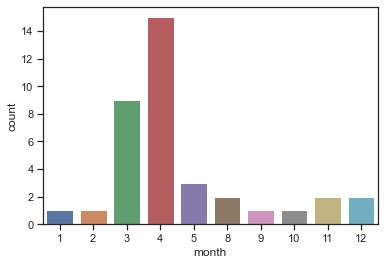

In [101]:
#fig = sns.countplot(count_month, x="month", y="count")
fig = sns.barplot(x="month", y="count", data=count_month)
#fig.show()

Este paso tiene como único objetivo concatenar todo el texto de las noticias por mes.

In [102]:
data_month = data.groupby(['month'])['Noticia'].apply(' '.join).reset_index()
data_month = data_month.set_index('month')
data_month

,Noticia
month,
1,"Actualmente, el INS mantiene asegurados a 1.4..."
2,Sin que tengamos claridad de los resultados f...
3,"Eduardo Cruickshank, de Restauración Nacional,..."
4,Varias entidades financieras reportaron este l...
5,El portal suplanta las identidades de la Super...
8,"El 7 de abril, las operadoras de pensiones em..."
9,Desde el pasado 6 de marzo Costa Rica reportó ...
10,Foto: Jorge Navarro La crisis del coronavirus...
11,Debido a la pandemia causada por el virus de ...


#### Limpieza de datos
En esta etapa se aplican filtros de limpieza que suelen usarse en los textos:

* Pasar textos a minúsculas
* Quitar signos de puntuación
* Quitar espacios extras y tabulaciones

In [103]:
def clean_text_round1(text):
    text = text.lower()
    text = re.sub('\[.*?¿\]\%', ' ', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
    text = re.sub('\w*\d\w*', '', text)
    return text
 
round1 = lambda x: clean_text_round1(x)
 
data_clean = pd.DataFrame(data_month.Noticia.apply(round1))

def clean_text_round2(text):
    text = re.sub('[‘’“”…«»]', '', text)
    text = re.sub('\n', ' ', text)
    return text
 
round2 = lambda x: clean_text_round2(x)
 
data_clean = pd.DataFrame(data_clean.Noticia.apply(round2))
data_clean

,Noticia
month,
1,actualmente el ins mantiene asegurados a ...
2,sin que tengamos claridad de los resultados f...
3,eduardo cruickshank de restauración nacional ...
4,varias entidades financieras reportaron este l...
5,el portal suplanta las identidades de la super...
8,el de abril las operadoras de pensiones emp...
9,desde el pasado de marzo costa rica reportó e...
10,foto jorge navarro la crisis del coronavirus...
11,debido a la pandemia causada por el virus de ...


A partir del conjunto de datos limpio, se crea un "Bag of Words" contando el número de veces que una palabra aparece en las noticias y calculando la frecuencia de las mismas. En este paso, se incluye la lectura de las "stopwords" en español desde nuestro repositorio, las cuales nos permiten filtrar palabras vacías o sin significado para nuestro análisis como articulos, pronombres, preposiciones, etc.

In [104]:
master = "D:\Personal\Maestria BigData\Trabajo Fin Master\SinSignificado.txt"
#req = requests.get(r'D:\Personal\Maestria BigData\Trabajo Fin Master\SinSignificado.txt')
#req = pd.read_fwf(r'D:\Personal\Maestria BigData\Trabajo Fin Master\SinSignificado.txt', header=None,encoding = 'utf8')
with open(r'D:\Personal\Maestria BigData\Trabajo Fin Master\SinSignificado.txt', "r",encoding = 'utf8') as archivo:
    lista = [linea.rstrip() for linea in archivo]

In [105]:
cv = CountVectorizer(stop_words=lista)
#print(data_clean.Noticia)
#print(cv)
data_cv = cv.fit_transform(data_clean.Noticia)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm.index = data_clean.index
 
data_dtm

,aarón,abandonar,abarcaban,abierta,abogada,abogados,abriendo,abril,abrir,abuelos,...,época,ésta,éste,última,últimas,último,últimos,única,únicamente,único
month,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,1,0,0,0,3,1,0,...,0,0,0,0,1,0,1,1,0,0
4,0,0,0,0,0,0,1,8,1,0,...,1,1,0,0,2,1,3,0,1,1
5,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
8,1,0,0,0,0,0,0,8,0,0,...,0,0,0,0,1,1,1,0,0,0
9,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
10,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0


## Análisis exploratorio

Con el dataframe transpuesto se inicia la exploración del dataset.

In [106]:
dt_data = data_dtm.transpose()
dt_data.head()

month,1,2,3,4,5,8,9,10,11,12
aarón,0,0,0,0,0,1,0,0,0,0
abandonar,0,0,0,0,0,0,1,0,0,0
abarcaban,0,0,1,0,0,0,0,0,0,0
abierta,0,0,1,0,0,0,0,0,0,0
abogada,0,0,0,0,0,0,0,1,0,0


Se extraen las palabras más usadas por meses, identificando las palabras como covid y sus sinónimos, FCL, jornada, reducción, estas palabras forman parte de la conversación habitual en las notas periodisticas sobre los FCL.

In [107]:
top_dict = {}
for c in dt_data.columns:
    top = dt_data[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))

for month, top_words in top_dict.items():
    print(month)
    print(', '.join([word+' '+str(count) for word, count in top_words[0:14]]))

1
ins 9, debe 5, aviso 5, contagio 4, ccss 4, trabajadores 4, covid 3, atención 3, nacional 3, instituto 3, accidente 3, actualmente 3, trabajo 3, caso 3
2
renta 9, trabajadores 6, global 5, año 5, declaración 5, ingresos 4, gastos 4, proyecto 4, colones 3, ley 3, rentas 3, deberán 3, contribuyentes 3, ingreso 3
3
fcl 38, proyecto 21, personas 20, trabajo 20, nacional 19, trabajadores 19, laboral 19, pensiones 18, pandemia 18, ley 16, datawrapper 16, emergencia 16, retiro 16, banco 16
4
laboral 33, pensiones 33, fcl 30, ley 27, personas 24, covid 17, suspensión 16, horas 16, fondo 16, contrato 16, jornada 16, trabajo 16, reducción 15, emergencia 15
5
ingreso 9, fuentes 9, personas 8, generar 6, idea 6, covid 6, además 5, proceso 5, alfaro 5, cuarentena 5, persona 5, hacer 5, forma 4, mercado 4
8
millones 13, datos 12, covid 10, ingresos 9, fcl 9, pensiones 8, personas 8, abril 8, bancarias 6, judicial 6, estafadores 6, fraudes 6, información 6, emergencia 5
9
migración 6, extranjería 5

Dentro de este listado se observa que hay varias palabras muy usadas sin un significado útil para el análisis. Por lo que se procede a crear una lista de las palabras menos usadas, para posteriormente unificarlo a nuestro listado de stopwords. 

In [108]:
from collections import Counter

words = []
for anio in dt_data.columns:
    top = [word for (word, count) in top_dict[anio]]
    for t in top:
        words.append(t)
print(Counter(words).most_common())
add_stop_words = [word for word, count in Counter(words).most_common() if count > 6]
add_stop_words

[('covid', 7), ('trabajo', 7), ('trabajadores', 5), ('personas', 5), ('laboral', 5), ('nacional', 4), ('ley', 4), ('fcl', 4), ('pensiones', 4), ('pandemia', 4), ('emergencia', 4), ('si', 4), ('caso', 3), ('trabajador', 3), ('relación', 3), ('proyecto', 3), ('ingreso', 3), ('puede', 3), ('lea', 3), ('suspensión', 3), ('contrato', 3), ('tiempo', 3), ('debe', 2), ('contagio', 2), ('virus', 2), ('caja', 2), ('salud', 2), ('patrono', 2), ('diciembre', 2), ('ingresos', 2), ('retiro', 2), ('operadoras', 2), ('país', 2), ('coronavirus', 2), ('jornada', 2), ('reducción', 2), ('hacer', 2), ('costa', 2), ('medida', 2), ('importante', 2), ('vez', 2), ('marzo', 2), ('empresas', 2), ('situación', 2), ('laborales', 2), ('pago', 2), ('contratos', 2), ('manera', 2), ('ins', 1), ('aviso', 1), ('ccss', 1), ('atención', 1), ('instituto', 1), ('accidente', 1), ('actualmente', 1), ('centros', 1), ('casos', 1), ('com', 1), ('riesgos', 1), ('correspondiente', 1), ('correo', 1), ('colaboradores', 1), ('contagi

['covid', 'trabajo']

En este paso, se actualiza la "Bag of Words" que se quitaran del conjunto de datos. Algunas de ellas se pueden incorporar manualmente a la lista.

In [109]:
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer

stop_words = lista #req.text.split(sep='\n')
for pal in add_stop_words:
    stop_words.append(pal)
more_stop_words=['mesa','aviso','caso','debe','horas','dato','idea','día','nuevo','según','si','hora','año','function', 'recomendamos', 'además', 'intermediate', 'display','ad','gpt','dijo','div','más','también', 'interarticle','pues','parte','está', 'cmd', 'push', 'googletag','alex','lucas','andrés','mirta','tres','primer','primera','dos','uno','veces', 'así', 'luego', 'quizá','cosa','cosas','tan','asi','cualquier','cuales','así','foto','hogar','pepe']
for pal in more_stop_words:
    stop_words.append(pal)

cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(data_clean.Noticia)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_stop.index = data_clean.index

### **Nubes de palabras por mes**
Se generan nubes de palabras para identificar los topicos principales por meses. Observando que en el mes de Julio, se mencionó varias veces la reapertura de servicios de comida en varias regiones del país.

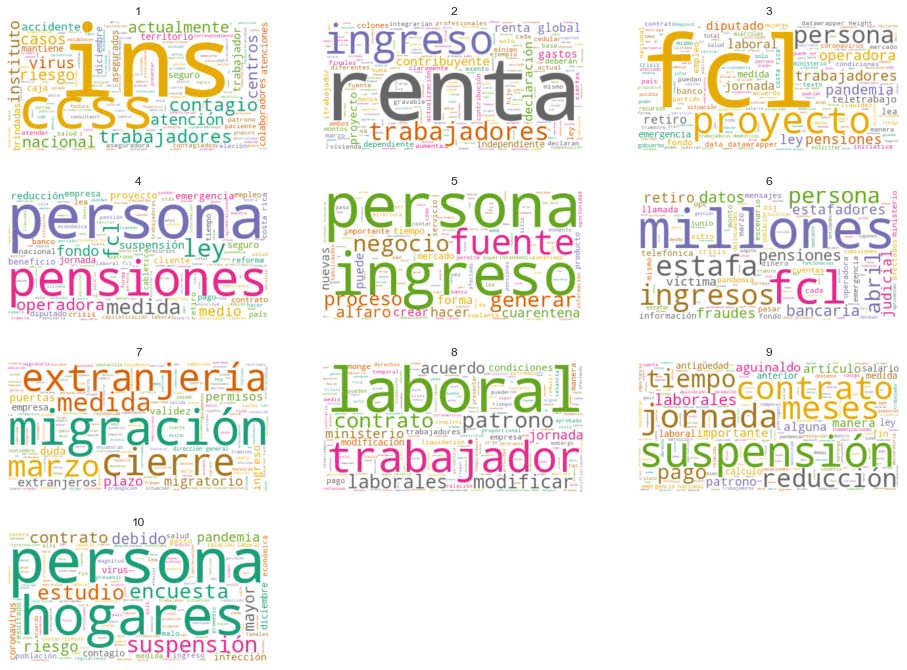

In [110]:
from wordcloud import WordCloud
anios = ['1','2','3','4','5','6','7','8','9','10','11','12']

wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [16,12]

for index, mes in enumerate(dt_data.columns):
    wc.generate(data_clean.Noticia[mes])
    plt.subplot(4, 3, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(anios[index])
plt.show()

## **Análisis de sentimientos**
Para cada noticia se analiza su polaridad y subjetividad, la primera asigna un valor positivo o negativo dependiendo del sentimiento identificado. 

# ADVERTENCIA: Este fragmento del código tarda debido a la traducción al idioma inglés con el módulo textblob.

In [111]:
import nltk
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
pol2 = lambda x: x.sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity
sub2 = lambda x: x.sentiment.subjectivity

traducir = lambda x: TextBlob(x).translate(to="en")

data['blob_en'] = data['Noticia'].apply(traducir)
data['polarity'] = data['blob_en'].apply(pol2)
data['subjectivity'] = data['blob_en'].apply(sub2)
data.to_csv('translated_news.csv', index=False) # Generación del archivo que contiene las noticias traducidas

Este dataframe (mismo que se genera en el paso anterior), contiene las notas periodisticas traducidas al idioma inglés.

In [112]:
data = pd.read_csv(r'C:\Users\OREAMUNOAE\Desktop\Maestria\translated_news.csv',sep=',',encoding = 'utf8')
#data = data.drop("Unnamed: 0", axis=1)
data

,Keywords,Titulo,Autor,Fecha,Link,resumen,Noticia,year,month,blob_en,polarity,subjectivity
0,"Covid, FCL",Crisis disparó retiros del FCL en operadoras d...,"Yeryis Salas.,",2020-08-22 00:00:00,/el-pais/politica/crisis-disparo-retiros-del-f...,"195.000 asalariados, equivalentes al 18% de lo...","El 7 de abril, las operadoras de pensiones em...",2020,8,"On April 7, pension operators began to deliver...",0.084201,0.343924
1,"Covid, FCL",#NoComaCuento: Sitio web para supuesto retiro...,"Nicole Pérez.,",2020-05-12 00:00:00,/no-coma-cuento/nocomacuento-sitio-web-para-s...,Criminales están empleando el sitio web fraud...,El portal suplanta las identidades de la Super...,2020,5,The portal impersonates the identities of the ...,0.018939,0.349242
2,"Covid, FCL",Delincuentes descubren en covid-19 una novedo...,"Eillyn Jiménez B..,",2020-08-04 00:00:00,/sucesos/judiciales/delincuentes-descubren-en...,"Karla Chinchilla, jefa de la Sección de Fraud...",El OIJ explicó que las modalidades de estafa s...,2020,8,The OIJ explained that the fraud modalities re...,0.029465,0.418525
3,"Covid, FCL",CCSS habilita plataforma web para conocer dón...,"José Andrés Céspedes.,",2020-04-15 00:00:00,/el-pais/servicios/ccss-habilita-plataforma-w...,La Caja Costarricense de Seguro Social (CCSS)...,Varias entidades financieras reportaron este l...,2020,4,Several financial entities reported this Monda...,0.085501,0.298969
4,"Covid, FCL",Diputados aprueban entrega del FCL a asalaria...,"Aarón Sequeira.,",2020-04-01 00:00:00,/el-pais/politica/diputados-autorizan-entrega...,Con 46 votos a favor este proyecto permitirá ...,"Los diputados Víctor Morales, del PAC, y Karin...",2020,4,"Deputies Víctor Morales, from the PAC, and Kar...",0.109211,0.469737
5,"Covid, FCL",Jefes de fracción debaten plan sobre entrega ...,"Aarón Sequeira.,",2020-03-31 00:00:00,/el-pais/politica/jefes-de-fraccion-debaten-p...,Nueva versión del proyecto de ley se estudiab...,"Eduardo Cruickshank, de Restauración Nacional,...",2020,3,"Eduardo Cruickshank, from the National Restora...",-0.008202,0.430270
6,"Covid, FCL",Gobierno estima que hasta 500.000 asalariados...,"Aarón Sequeira.,",2020-03-28 00:00:00,/el-pais/politica/gobierno-estima-que-hasta-5...,Cifra equivale a más de un 40% de la població...,"Eduardo Cruickshank y Carlos Avendaño, del Pa...",2020,3,"Eduardo Cruickshank and Carlos Avendaño, from ...",0.079041,0.516042
7,"Covid, FCL",#NoComaCuento: Delincuentes utilizan posible ...,"Nicole Pérez.,",2020-03-26 00:00:00,/no-coma-cuento/nocomacuento-delincuentes-uti...,"El Banco Nacional alertó, en sus redes social...","El Banco Nacional alertó, en sus redes social...",2020,3,"The National Bank warned, in its social networ...",-0.032917,0.356667
8,"Covid, FCL",Grupo de diputados sugiere texto para entrega...,Josué Bravo.,2020-03-25 00:00:00,/el-pais/politica/diputados-alcanzan-acuerdo-...,Podrían retirar el FCL quienes sufran suspens...,Los trabajadores afectados salarialmente por ...,2020,3,Workers affected by the national emergency in ...,0.074569,0.440367
9,"Covid, Jornada Laboral","Digitalización y retos del Derecho Laboral,","Café Laboral, Alejandro Trejos G. Socio BDS A...",2021-04-30 16:45:00,/blogs/cafe-laboral/digitalizacion-y-retos-del...,El país puede aprovechar la tendencia al cambi...,Si bien el tema no es nuevo porque se viene ha...,2021,4,Although the subject is not new because it has...,0.071802,0.363532


### **Visualización sobre las métricas subjetividad y polaridad en las noticias**
Se genera una visualización global con las métricas de subjetividad y polaridad de tal modo que se pueda observar que tipos de sentimientos predominaron durante el año 2020, observando que gran parte de las noticias se basaron en hechos y no en opiniones, y que el sentimiento que predomino principalemente fue el positivo aunque muy cercano a un estado neutral.

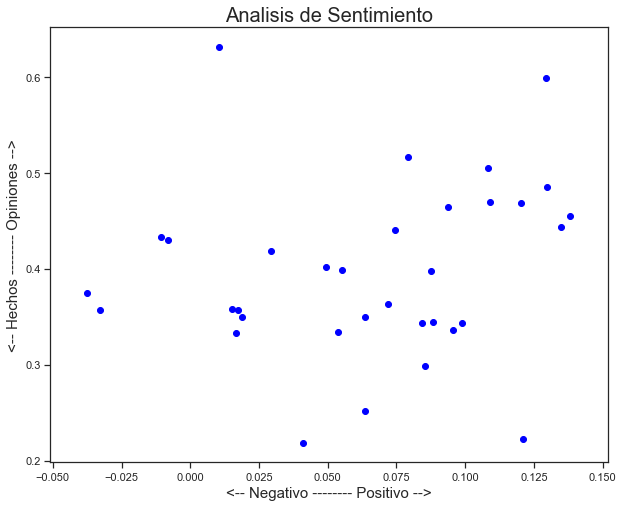

In [113]:
plt.rcParams['figure.figsize'] = [10, 8]

for index, anio in enumerate(data.index):
    x = data.polarity.loc[anio]
    y = data.subjectivity.loc[anio]
    plt.scatter(x, y, color='blue')
    #plt.text(x+.001, y+.001, data['full_name'][index], fontsize=10)
    plt.xlim(-0.051, 0.152) 
    
plt.title('Analisis de Sentimiento', fontsize=20)
plt.xlabel('<-- Negativo -------- Positivo -->', fontsize=15)
plt.ylabel('<-- Hechos -------- Opiniones -->', fontsize=15)

plt.show()

### **Distribución de la polaridad**
Con esta distribución de la polaridad, se corrobora lo anteriormente mencionado.

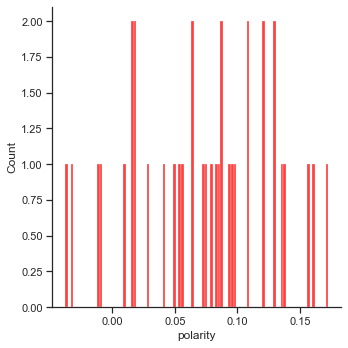

In [114]:
#fig = px.histogram(data, x="polarity", nbins=50)
#fig.show()
#fig = sns.countplot(count_month, x="month", y="count")
#fig = sns.barplot(data,x="polarity", nbins=50 )
sns.displot(data['polarity'], kde=False, color='red', bins=100)
#fig.show()

###### **Serie de tiempo: Polaridad y fecha de publicación de la nota periodística**
Finalmente, para este análisis de sentimientos se ordenan los registros por fecha para generar una visualización por día de publicación y su polaridad de tal manera que se pueda identificar que días se predominaron noticias más positivas o negativas. Observando que el 26 y 31 de marzo y 22 de setiembre se tuvieron las noticias con mayor percepción negativa y el 8 de octubre y 5 y 24 de noviembre con mayor positividad.

In [115]:
data = data.sort_values(by=['Fecha'])

<ipython-input-116-75acf9b4a65e>:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(labels=data['Fecha'],rotation=75)


<function matplotlib.pyplot.show(close=None, block=None)>

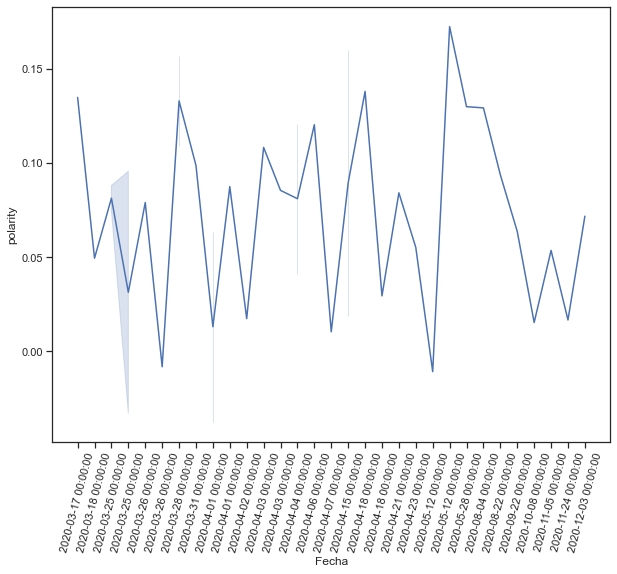

In [116]:
g=sns.lineplot(data=data, x="Fecha", y="polarity")
g.set_xticklabels(labels=data['Fecha'],rotation=75)
plt.show

### Estadísticas descriptivas

In [81]:
# NO le veo valor agregado
df_raw2[cat_cols].describe(include='all')

,RangoEdad,Genero,EstadoCivil,RangoSalario,RangoSalarioRetorno,Pensionado,TuvoReduccion
count,424865,424865,424865,424865.000000,424865.000000,424865.0,424865.000000
unique,4,3,6,NaN,NaN,NaN,NaN
top,Entre31y45,M,SLT,NaN,NaN,NaN,NaN
freq,181457,279819,233641,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,1.695604,1.063105,0.0,0.172111
std,NaN,NaN,NaN,0.850357,1.074943,0.0,0.377477
min,NaN,NaN,NaN,1.000000,0.000000,0.0,0.000000
25%,NaN,NaN,NaN,1.000000,0.000000,0.0,0.000000
50%,NaN,NaN,NaN,2.000000,1.000000,0.0,0.000000
75%,NaN,NaN,NaN,2.000000,2.000000,0.0,0.000000


In [82]:
#No le veo valor agregado
df_raw2[num_cols].describe()

,HayAportes,Brecha,InactivoPostUltAporte,InactivoPostRetiro
count,424865.000000,424865.000000,424865.000000,424865.000000
mean,2.433451,0.632500,3.432471,2.333106
std,2.926957,1.045776,3.975355,3.639625
min,0.000000,-5.000000,-1.000000,-1.000000
25%,0.000000,0.000000,-1.000000,0.000000
50%,1.000000,1.000000,3.000000,0.000000
75%,4.000000,1.000000,7.000000,4.000000
max,12.000000,6.000000,11.000000,11.000000


### Revisar

Based on numerical columns descriptive analysis, average tenure, average monthly charges and total charges of subscriber is **32 months, 64 dollars and 2282 dollars**, respectively.

In [83]:
def Outlier_boxplot(df, col):
    """ Display boxplot for given column """
    sns.boxplot(x=df[col])
    plt.show()

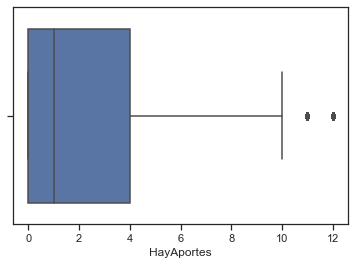

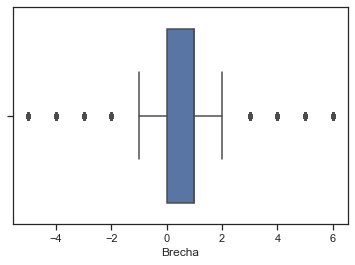

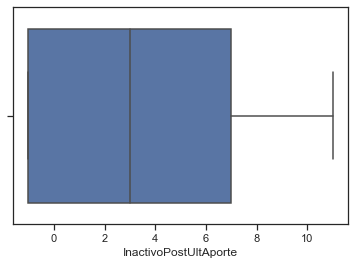

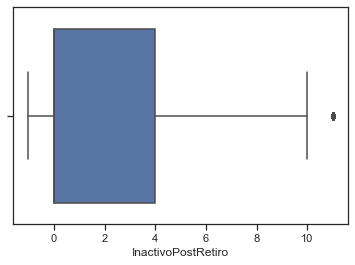

In [84]:
for i in num_cols:
    Outlier_boxplot(df_raw2,i) #df_cal

Box plot graphs shows that **none** of the numerical columns have outliers.

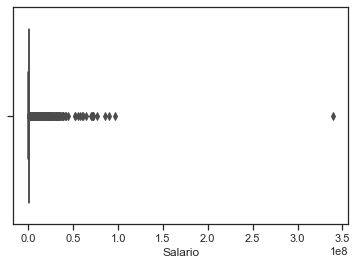

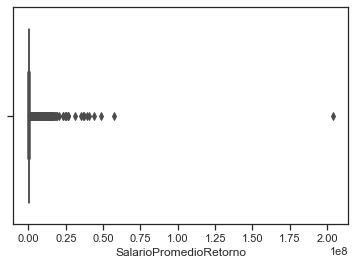

In [85]:
for i in monto_cols:
    Outlier_boxplot(df_raw2,i) #df_cal

### Calcula tasa desempleo por COVID

In [86]:
df_raw2.head().T

,0,1,2,3,4
edad,71,64,64,63,63
RangoEdad,entre59y100,entre59y100,entre59y100,entre59y100,entre59y100
Genero,F,F,F,F,F
EstadoCivil,SLT,VID,VID,CSD,CSD
Salario,61400,1.3448e+06,717233,1.49417e+06,3.15207e+07
RangoSalario,1,4,2,4,6
HayAportes,2,1,0,2,1
SalarioPromedioRetorno,61400,717233,NaN,1.64318e+07,1.3429e+06
RangoSalarioRetorno,1,2,0,6,4
Brecha,0,2,2,-2,2


In [87]:
df_raw2['Desempleado'] = df_raw2.Desempleado.map({'Si':1,'No':0})

### Correlation

In [36]:
def Generate_heatmap_graph(corr, chart_title, mask_uppertri=False ):
    """ Based on features , generate correlation matrix """
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = mask_uppertri

    fig,ax = plt.subplots(figsize=(12,12))
    sns.heatmap(corr
                , mask = mask
                , square = True
                , annot = True
                , annot_kws={'size': 10.5, 'weight' : 'bold'}
                , cmap=plt.get_cmap("YlOrBr")
                , linewidths=.1)
    plt.title(chart_title, fontsize=14)
    plt.show()

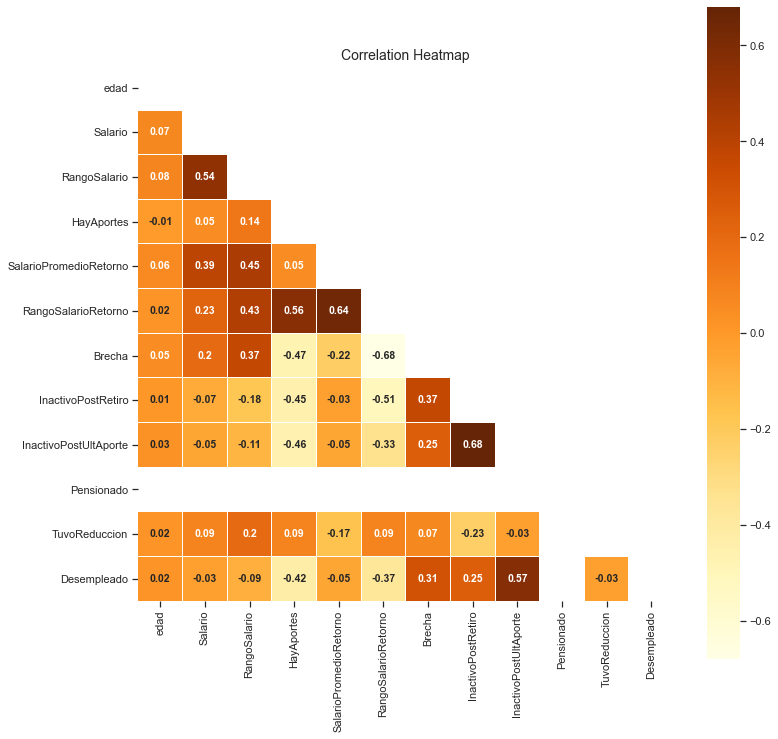

In [37]:
var_corr = round(df_raw2.corr(),2)
Generate_heatmap_graph(var_corr
                       ,chart_title = 'Correlation Heatmap'
                       ,mask_uppertri = True)

From correlation matrix, features like **tenure, Monthly charges and Total charges** are highly correlated with services like MultipleLines of phone services and Internet services like OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV and Streaming Movies services.

### Distribución de Variables según desempleado

#### Distribución de variables categóricas y binarias

In [38]:
def Create_data_label(ax):
    """ Display data label for given axis """
    for bar in ax.patches:
            ax.text(bar.get_x() + bar.get_width()/ 2
                    , bar.get_height() + 0.01
                    , str(round(100 * bar.get_height(),2)) + '%'
                    , ha = 'center'
                    , fontsize = 13)
            
            
def Categorical_var_dist(data, cols, distribution_col):
    """ Distribution of categorical variable based on target variable """
    
    for i,feature in enumerate(cols):
        
        feature_summary = data[feature].value_counts(normalize=True).reset_index(name='Porcentaje')
        
        plt_cat = sns.catplot(x=feature
                , y='Porcentaje'
                , data = feature_summary
                , col=distribution_col
                , kind='bar'
                , aspect = 0.8
                , palette = plotColor
                , alpha = 0.6)
        
        if feature == 'RangoSalario':
            plt_cat.set_xticklabels(rotation= 65, horizontalalignment = 'right')

        if feature == 'RangoSalarioRetorno':
            plt_cat.set_xticklabels(rotation= 65, horizontalalignment = 'right')
            
        for ax1, ax2 in plt_cat.axes:
            Create_data_label(ax1)
            Create_data_label(ax2)
        
        plt.ylim(top=1)
        plt.subplots_adjust(top = 0.9)
        plt.gcf().suptitle(feature+" distribución",fontsize=14)
    plt.show()            

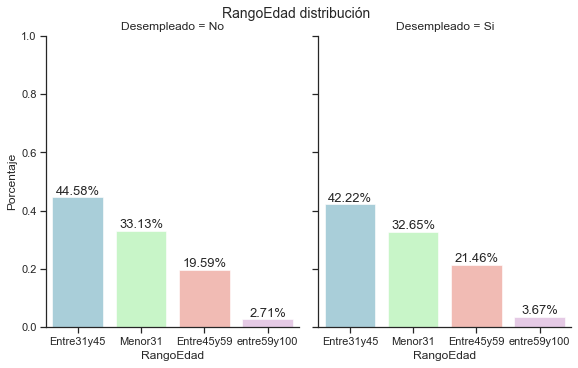

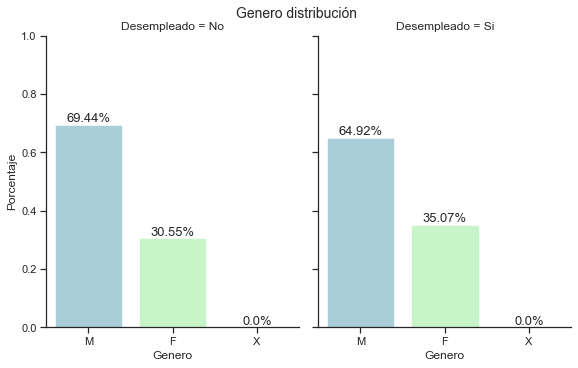

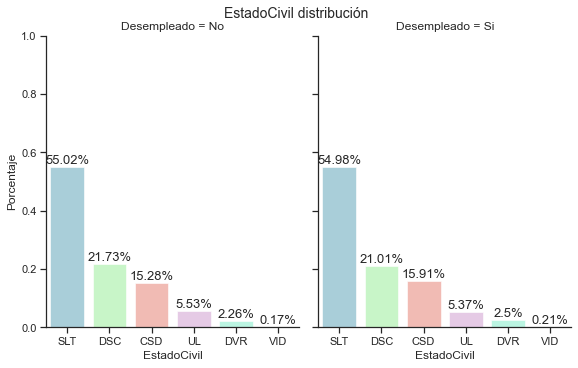

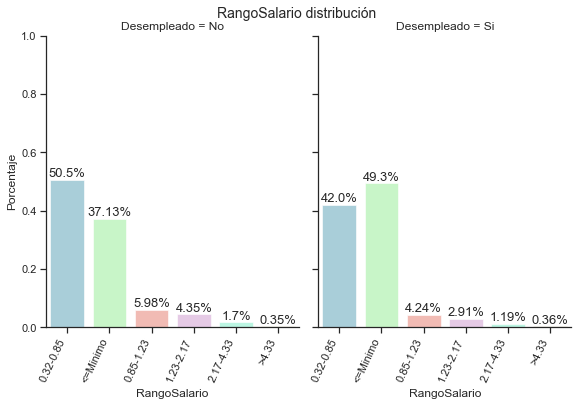

posx and posy should be finite values
posx and posy should be finite values


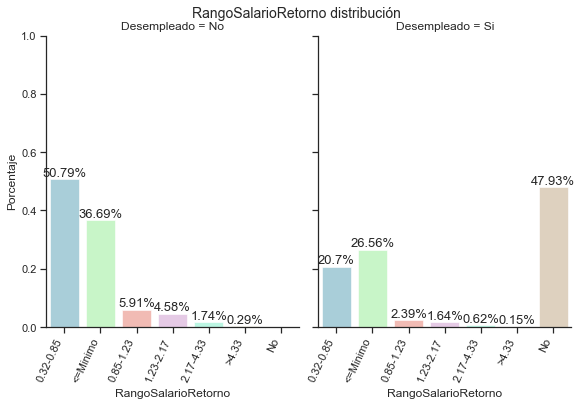

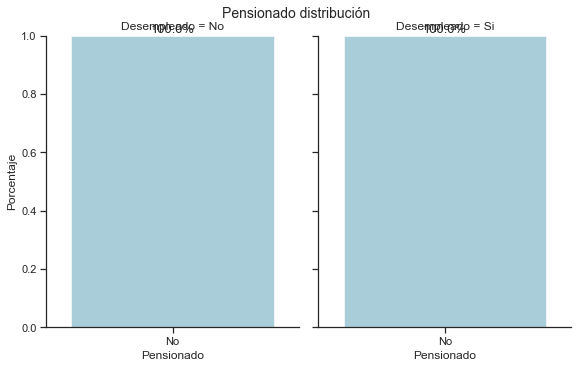

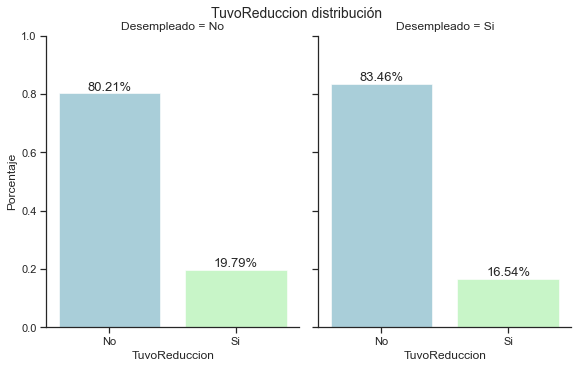

In [39]:
suma_desempleado = df_raw.groupby('Desempleado')
Categorical_var_dist(suma_desempleado, cat_cols,'Desempleado')

From above analysis, churn customers are likely to

* not have partners and Dependents; Means likely to be Single.
* have Internet service and specifically Fiber optics
* not have online security service, online backup service, device protection service, Tech support service
* have streaming TV and streaming Movies services
* be with monthly based contract
* have paperless billing service
* have electronic check payment method

### Distribution of Tenure, Monthly Charges and Total Charges

In [41]:
# Mean summary of customers (Churn vs Non churn)
print(suma_desempleado[['edad','Salario','SalarioPromedioRetorno']].mean())

                  edad        Salario  SalarioPromedioRetorno
Desempleado                                                  
No           36.542610  521009.387228           521723.412905
Si           37.084237  438280.173775           438094.718603


Result shows that Churn customers have more Monthly charges compared to existing customers.
Also, there is a drastic difference in Tenure and Total Charges for Churn vs existing customers.

Let's check distribution of each features with target variable.

El resultado muestra que los trabajadores que quedaron desempleados tenían un salario promedio mensual inferior a los que se quedaron. Y los que regresaron, lo hicieron por salarios simiares en promedio.

Con respecto a la edad promedio no hay mucha diferencia

Comprobaremos la distribución de cada característica con la variable de destino.

### Se identificarán los salario anomalos.

In [42]:
def detect_outlier(data):
    # find q1 and q3 values
    q1, q3 = np.percentile(sorted(data), [0.5, 99.5])  #Antes 25 y 75
 
    # compute IRQ
    iqr = q3 - q1
 
    # find lower and upper bounds
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
 
    outliers = [x for x in data if x <= lower_bound or x >= upper_bound]
    return outliers

In [44]:
for i in monto_cols:
    detect_outlier((df_raw[i]))
    
#print(detect_outlier((df_raw['Salario'])))
#print(detect_outlier((df_raw['SalarioPromedioRetorno'])))

### Ajustamos valores anomalos

In [118]:
df_raw.head(10).T
df_raw1 = df_raw.copy()
#df_raw1.head().T
#df_test = df_raw1.copy()
#df_test['RangoSalario'] = df_test.RangoSalario.map({0:'No',1:'Sub',2:'0.32-0.85',3:'0.85-1.23',4:'1.23-2.17',5:'2.17-4.33',6:'>4.33'})
#df_test['RangoSalarioRetorno'] = df_test.RangoSalarioRetorno.map({0:'No',1:'Sub',2:'0.32-0.85',3:'0.85-1.23',4:'1.23-2.17',5:'2.17-4.33',6:'>4.33'})
#df_test['TuvoReduccion'] = df_test.TuvoReduccion.map({1:'Si',0:'No'})
#df_test['Pensionado'] = df_test.Pensionado.map({1:'Si',0:'No'})
#df_test['Desempleado'] = df_test.Desempleado.map({1:'Si',0:'No'})
#df_test.head().T
#df_raw1 = df_test.copy()

In [119]:
# Cambiando los anomalos a la media
'''
for j in monto_cols:    
    media = np.mean(df_raw1[j])
    #print(media)
    outliers = detect_outlier(df_raw1[j])
    #print(len(outliers))
    if len(outliers)>0:
        for i in range(0,len(df_raw1)):
            if df_raw1[j][i] in outliers: ##== -200:
                #print(df_raw1[j][i])
                df_raw1[j][i] = media
'''                
### eliminando los anomalos, pero colocando el anterior, no parece muy aceptable
for j in monto_cols:    
    media = np.mean(df_raw1[j])
    #print(media)
    outliers = detect_outlier(df_raw1[j])
    #print(len(outliers))
    if len(outliers)>0:
        for i in range(0,len(df_raw1)):
            if df_raw1[j][i] in outliers: ##== -200:
                #print(df_raw1[j][i])
                df_raw1 = df_raw1.drop(df_raw1[df_raw1['Salario']==df_raw1[j][i]].index)
                #df_raw1[j][i] = media
        
df_raw1 = df_raw1.reset_index(drop=True)        
#df_raw1.drop(detect_outlier((df_raw['Salario'])), inplace = True)
#df_raw1.drop(detect_outlier((df_raw['SalarioPromedioRetorno'])), inplace = True)

NameError: name 'detect_outlier' is not defined

In [47]:
df_raw1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424575 entries, 0 to 424574
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   edad                    424575 non-null  float64
 1   RangoEdad               424575 non-null  object 
 2   Genero                  424575 non-null  object 
 3   EstadoCivil             424575 non-null  object 
 4   Salario                 424575 non-null  float64
 5   RangoSalario            424575 non-null  object 
 6   HayAportes              424575 non-null  float64
 7   SalarioPromedioRetorno  263372 non-null  float64
 8   RangoSalarioRetorno     424575 non-null  object 
 9   Brecha                  424575 non-null  float64
 10  InactivoPostRetiro      424575 non-null  float64
 11  InactivoPostUltAporte   424575 non-null  float64
 12  Pensionado              424575 non-null  object 
 13  TuvoReduccion           424575 non-null  object 
 14  Desempleado         

## 3. Cluster Analysis

Comprobaremos si existe alguna relación entre la edad y el salario recibido.

In [48]:
#df_raw.Desempleado
df_raw1['Desempleado_code'] = df_raw1['Desempleado'].map({'Si': 1,'No': 2}).astype(int)

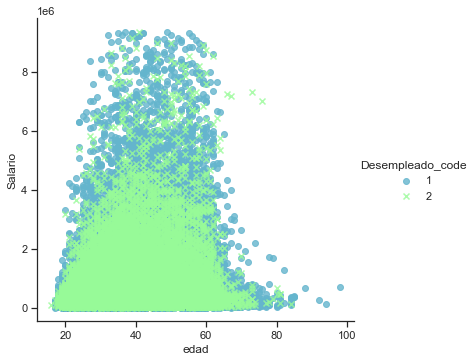

In [49]:
sns.lmplot(x='edad'
           ,y='Salario'
           ,data=df_raw1
           ,hue='Desempleado_code'
            ,fit_reg=False
            ,markers=["o", "x"]
            ,palette= plotColor)
plt.show()

** A partir del análisis, hay algunos grupos basados en la edad y el salario anterior. ** 

Aplicaremos el algoritmo de clúster de K-means para ver los clústeres. Antes de pasar datos al algoritmo K-means, es necesario normalizar las variables

In [50]:
def Normalize_feature(feature):
    """ Return normalized features """
    return prepro.StandardScaler().fit_transform(feature)

In [51]:
# normalized tenure and monthlycharges

df_raw1['edad_norm'] = Normalize_feature(df_raw1[['edad']])
df_raw1['salario_norm'] = Normalize_feature(df_raw1[['Salario']])
df_raw1.head()

,edad,RangoEdad,Genero,EstadoCivil,Salario,RangoSalario,HayAportes,SalarioPromedioRetorno,RangoSalarioRetorno,Brecha,InactivoPostRetiro,InactivoPostUltAporte,Pensionado,TuvoReduccion,Desempleado,Desempleado_code,edad_norm,salario_norm
0,71.0,entre59y100,F,SLT,61400.00,<=Minimo,2.0,61400.00,<=Minimo,0.0,0.0,2.0,No,No,Si,1,3.186518,-0.722864
1,64.0,entre59y100,F,VID,1344800.00,1.23-2.17,1.0,717233.33,0.32-0.85,2.0,0.0,8.0,No,Si,Si,1,2.531140,1.714103
2,64.0,entre59y100,F,VID,717233.33,0.32-0.85,0.0,NaN,No,2.0,8.0,8.0,No,No,Si,1,2.531140,0.522456
3,63.0,entre59y100,F,CSD,1494166.67,1.23-2.17,2.0,16431816.67,>4.33,-2.0,1.0,0.0,No,No,Si,1,2.437514,1.997725
4,63.0,entre59y100,F,CSD,1559400.00,1.23-2.17,0.0,NaN,No,4.0,0.0,0.0,No,No,Si,1,2.437514,2.121593


In [52]:
def Create_elbow_curve(data):
    """ Display elbow curve for K-means algo for given data """
    df_kmeans_data = data

    k = range(1,10)
    kmeans = [KMeans(n_clusters=i) for i in k]

    score = [kmeans[i].fit(df_kmeans_data).score(df_kmeans_data)  for i in range(len(kmeans))]

    plt.figure(figsize=(10,6))
    plt.plot(k,score)
    plt.xlabel("Clusters")
    plt.ylabel("Score")
    plt.title("Elbow curve",fontsize=15)
    plt.show()

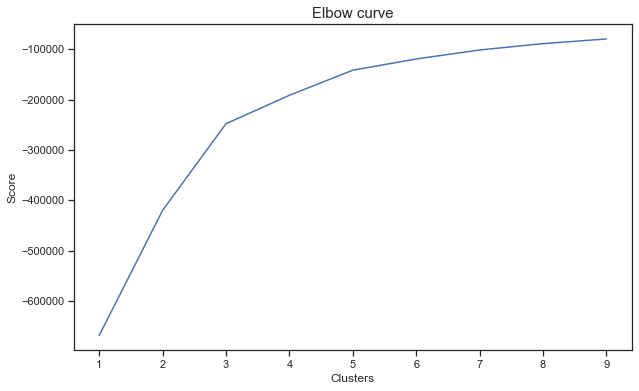

In [53]:
# checking number of clusters

Create_elbow_curve(df_raw1[df_raw1.Desempleado_code==1][['edad_norm','salario_norm']])

De la curva elbow, 5 parece más ser el número más eficiente.

In [54]:
def Create_kmeans_cluster_graph(df_cal, data, n_clusters, x_title, y_title, chart_title):
    """ Display K-means cluster based on data """
    
    kmeans = KMeans(n_clusters=n_clusters # No of cluster in data
                    , random_state = random_state # Selecting same training data
                   ) 

    kmeans.fit(data)
    kmean_colors = [plotColor[c] for c in kmeans.labels_]


    fig = plt.figure(figsize=(12,8))
    plt.scatter(x= x_title + '_norm'
                , y= y_title + '_norm'
                , data=data 
                , color=kmean_colors # color of data points
                , alpha=0.25 # transparancy of data points
               )

    plt.xlabel(x_title)
    plt.ylabel(y_title)

    plt.scatter(x=kmeans.cluster_centers_[:,0]
                , y=kmeans.cluster_centers_[:,1]
                , color='black'
                , marker='X' # Marker sign for data points
                , s=100 # marker size
               )
    
    plt.title(chart_title,fontsize=15)
    plt.show()
    
    return kmeans.fit_predict(df_cal[df_cal.Desempleado_code==1][[x_title+'_norm', y_title +'_norm']])    

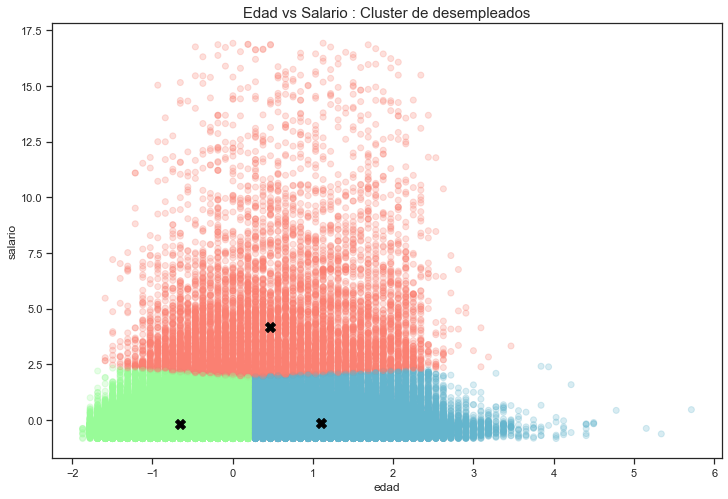

array([ 0, -1,  2,  1], dtype=int64)

In [55]:
df_raw1['Cluster'] = -1 # by default set Cluster to -1
df_raw1.loc[(df_raw1.Desempleado_code==1),'Cluster'] = Create_kmeans_cluster_graph(df_raw1
                            ,df_raw1[df_raw1.Desempleado_code==1][['edad_norm','salario_norm']]
                            ,3  ## Clusters
                           ,'edad'
                           ,'salario'
                           ,"Edad vs Salario : Cluster de desempleados")

df_raw1['Cluster'].unique()

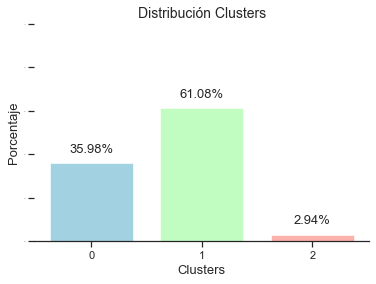

In [56]:
# Distribution of clusters
Desempleado_distribucion =  df_raw1[df_raw1['Desempleado_code']==1].Cluster.value_counts(normalize=True).sort_index()

Generate_bar_graph( x= Desempleado_distribucion.index
                   , y = Desempleado_distribucion.values
                   , x_title = 'Clusters'
                   , y_title = 'Porcentaje'
                   , chart_title = 'Distribución Clusters'
                  , color = plotColor)

Con base en el gráfico de clusters de K-medias, podemos ver que hay tres grupos y dos con poco aporte. 

* Edades altas y salarios altos (grupo verde) 
* Edades intermedias y salarios bajos (grupo celeste) 
* Baja edad y bajos ingresos (grupo turquesa) 
* Edades laborales e ingresos intermedios (grupo lila)
* Rango de edad amplio e ngresos altos (grupo rojo)

Y el gráfico de distribución muestra que alrededor del 70% de los desempleados pertenecen a los clúster celeste y turquesa, que destacan por sus bajos ingresos.

Con 3 cluster el analisis salió muy parecido.

* Edades de jovenes a intermedias y salarios bajos a intermedios (grupo celeste) 
* Edades intermedias a mayores y salarios bajos a intermedios (grupo rojo) 
* Rango de edad amplio e ingresos intermedios a altos (grupo verde)

Y el gráfico de distribución muestra que alrededor del 97% de los desempleados pertenecen a los clúster celeste y rojo, que destacan por sus bajos ingresos.

Revisemos los promedios de edades y salarios por cluster.

In [57]:
df_cluster_gp = df_raw1[df_raw1['Desempleado_code']==1].groupby('Cluster')
print(df_cluster_gp[['edad','Salario']].mean())

              edad       Salario
Cluster                         
0        48.774517  3.656119e+05
1        29.955871  3.522885e+05
2        41.909882  2.647386e+06


Basándome en información demográfica y otra relacionada con el desempleado, se ha intentado explorar las características de los trabajadores que desemplearon de cada grupo. 

In [58]:
def Extract_highest_in_cluster(df_cal, df_cluster, feature, edad_salario_cluster_df ):
    """ For each features, compare cluster's value with overall value 
    and find out highest distributed features for that cluster  """
    
    #print(feature)
    df = df_cal.copy()
    feature_churn_dist = df[(df['Desempleado_code']==1)][feature].value_counts(normalize=True).reset_index()
    #print(feature_churn_dist)
    feature_churn_dist.columns = [feature,'Percentage']
      
    feature_cluster_dist = df_cluster[feature].value_counts(normalize=True).to_frame()
    feature_cluster_dist.columns = ['Percentage']
    feature_cluster_dist = feature_cluster_dist.reset_index()
    feature_cluster_dist_new = feature_cluster_dist.copy()
    
    edad_salario_df = df_cal[df_cal['Desempleado_code']==1].groupby(['Cluster',feature],as_index=False)[['edad','Salario']].mean()
    #print(edad_salario_df)
    
    for i,cluster in enumerate(feature_cluster_dist_new['Cluster'].unique()):
        for i, label in enumerate(feature_churn_dist[feature].unique()):
            cluster_val = feature_cluster_dist_new[(feature_cluster_dist_new['Cluster']==cluster) & (feature_cluster_dist_new[feature]==label)]['Percentage']
            feature_val = feature_churn_dist[feature_churn_dist[feature] == label]['Percentage']
            
            if((len(feature_val.values) > 0) & (len(cluster_val.values) > 0)) :
                if((feature_val.values[0] < cluster_val.values[0])):
                    
                    edad_salario_cluster_df = edad_salario_cluster_df.append(pd.DataFrame({'Category':feature
                            , 'Label': ("Not have a "+ feature) if (df_cal[feature].dtypes == 'int64') & (label == 0) else (("Have a "+feature) if (df_cal[feature].dtypes == 'int64') & (label == 1) else label)
                            , 'Percentage': cluster_val.values[0]
                            , 'Cluster' : cluster
                            , 'Avg_edad':    round(edad_salario_df[(edad_salario_df['Cluster']==cluster) & (edad_salario_df[feature]==label) ]['edad'].values[0],2)
                            , 'Avg_salario': round(edad_salario_df[(edad_salario_df['Cluster']==cluster) & (edad_salario_df[feature]==label) ]['Salario'].values[0],2)
                            , 'Represent_in_graph': 0 if (label == 0) | (label == 'No') else 1
                            , 'Label_in_graph' :  feature if (df_cal[feature].dtypes == 'int64') else label
                           }
                        , index = [len(edad_salario_cluster_df)])
                        )
    
    return edad_salario_cluster_df                    

In [59]:
#df_raw1.head().T
#df_test = df_raw1.copy()
#df_test['RangoSalario'] = df_test.RangoSalario.map({0:'No',1:'Sub',2:'0.32-0.85',3:'0.85-1.23',4:'1.23-2.17',5:'2.17-4.33',6:'>4.33'})
#df_test['RangoSalarioRetorno'] = df_test.RangoSalarioRetorno.map({0:'No',1:'Sub',2:'0.32-0.85',3:'0.85-1.23',4:'1.23-2.17',5:'2.17-4.33',6:'>4.33'})
#df_test['TuvoReduccion'] = df_test.TuvoReduccion.map({1:'Si',0:'No'})
#df_test['Pensionado'] = df_test.Pensionado.map({1:'Si',0:'No'})
#df_test['Desempleado'] = df_test.Desempleado.map({1:'Si',0:'No'})
#df_test.head().T
#df_raw1 = df_test.copy()

In [60]:
edad_salario_cluster_df = pd.DataFrame()

#col_tot = nominal_cols + binary_cols
#nominal_cols = ["RangoEdad","Genero","EstadoCivil","RangoSalario","RangoSalarioRetorno","HayAportes",
#                 "Diferenciabrechas","InactivoPostUltAporte","InactivoPostRetiro"]

#binary_cols = ["Pensionado","TuvoReduccion"] "HayAportes","Diferenciabrechas","InactivoPostRetiro","InactivoPostUltAporte"
for feature in ["RangoEdad","Genero","EstadoCivil","RangoSalario","RangoSalarioRetorno"
                 ,"Pensionado","TuvoReduccion"]:
    #print(feature)
    edad_salario_cluster_df = Extract_highest_in_cluster(df_raw1, df_cluster_gp, feature,edad_salario_cluster_df)

#### Cluster 1 -Mayores de 45 años, hombres  y salarios menores a 1.2 millones. 

In [61]:
edad_salario_cluster_df[edad_salario_cluster_df['Cluster']==0]

,Category,Label,Percentage,Cluster,Avg_edad,Avg_salario,Represent_in_graph,Label_in_graph
0,RangoEdad,Entre45y59,0.570591,0,50.62,362993.95,1,Entre45y59
1,RangoEdad,entre59y100,0.097572,0,61.42,345446.06,1,entre59y100
7,Genero,M,0.688579,0,49.13,378684.62,1,M
8,Genero,X,0.000050,0,47.00,219318.28,1,X
11,EstadoCivil,CSD,0.288551,0,50.15,403047.60,1,CSD
12,EstadoCivil,UL,0.073503,0,48.14,334916.67,1,UL
13,EstadoCivil,DVR,0.050203,0,50.22,385915.26,1,DVR
14,EstadoCivil,VID,0.004957,0,54.34,354199.27,1,VID
20,RangoSalario,<=Minimo,0.503408,0,49.11,179400.09,1,<=Minimo
21,RangoSalario,0.32-0.85,0.431012,0,48.44,470321.83,1,0.32-0.85


### Cluster 2 - Rango edad menores 45 años y con salarios menores a 850 mil. Mujeres solteras.

In [62]:
edad_salario_cluster_df[edad_salario_cluster_df['Cluster']==1]

,Category,Label,Percentage,Cluster,Avg_edad,Avg_salario,Represent_in_graph,Label_in_graph
2,RangoEdad,Entre31y45,0.469945,1,34.77,379322.53,1,Entre31y45
3,RangoEdad,Menor31,0.530055,1,25.69,328320.31,1,Menor31
9,Genero,F,0.375798,1,29.88,344351.29,1,F
15,EstadoCivil,SLT,0.609860,1,29.80,359864.63,1,SLT
16,EstadoCivil,DSC,0.261276,1,28.76,323792.21,1,DSC
23,RangoSalario,<=Minimo,0.511139,1,29.46,177809.47,1,<=Minimo
24,RangoSalario,0.32-0.85,0.434244,1,30.30,464351.13,1,0.32-0.85
30,RangoSalarioRetorno,<=Minimo,0.274595,1,29.86,306491.67,1,<=Minimo
31,RangoSalarioRetorno,0.32-0.85,0.215195,1,30.36,442047.14,1,0.32-0.85
37,TuvoReduccion,No,0.840424,1,29.87,328478.21,0,No


#### Cluster 3 - mayores a 31 años, hombres con salarios mayores a 1.2. 

In [63]:
edad_salario_cluster_df[edad_salario_cluster_df['Cluster']==2]

,Category,Label,Percentage,Cluster,Avg_edad,Avg_salario,Represent_in_graph,Label_in_graph
4,RangoEdad,Entre31y45,0.536260,2,37.71,2530650.52,1,Entre31y45
5,RangoEdad,Entre45y59,0.310306,2,50.59,2882350.16,1,Entre45y59
6,RangoEdad,entre59y100,0.052291,2,60.77,2913624.34,1,entre59y100
10,Genero,M,0.684131,2,42.29,2697534.65,1,M
17,EstadoCivil,CSD,0.303631,2,46.57,2807331.91,1,CSD
18,EstadoCivil,DVR,0.044098,2,48.43,2735275.38,1,DVR
19,EstadoCivil,VID,0.003742,2,56.19,2521972.51,1,VID
25,RangoSalario,1.23-2.17,0.497724,2,40.77,1794916.41,1,1.23-2.17
26,RangoSalario,2.17-4.33,0.403661,2,42.54,2900118.48,1,2.17-4.33
27,RangoSalario,>4.33,0.098614,2,45.11,5915430.42,1,>4.33


#### Cluster 4 - Edad entre 38 y 50 años y salarios entre 3.5 y 5.5 millones

In [64]:
#edad_salario_cluster_df[edad_salario_cluster_df['Cluster']==3] Analisis para 5 clusters

#### Cluster 5 - Edad entre 38 y 41años y salarios entre 280000 y 500000 mil

In [65]:
# edad_salario_cluster_df[edad_salario_cluster_df['Cluster']==4] Analisis para 5 clusters

### Representación gráfica de clústeres

In [66]:
def Create_kmeans_cluster_with_label(data, cluster_visualize_gp, x_title, y_title, chart_title):
    """ Generate K-means cluster with labels """
    
    legend_list = []
    category_color = cluster_visualize_gp[['Category']].drop_duplicates().reset_index()
    annotations = []
    #print(data)
    #print([plotColor[c] for c in data.Cluster])
    #df_raw1[df_raw1['Desempleado_code']==1].groupby('Cluster')
           
    fig, ax = plt.subplots(figsize=(12,8))
    plt.scatter(x= x_title 
                , y= y_title
                , data=data 
                , color=[plotColor[c] for c in data.Cluster] # color of data points
                , alpha=0.25 # transparancy of data points
                , s = 15
               )

    for i,txt in enumerate(cluster_visualize_gp['Label_in_graph']):
        annotations.append(ax.text(cluster_visualize_gp['Avg_edad'][i]
                                , cluster_visualize_gp['Avg_salario'][i]
                                , txt))
                                #, fontsize = 13
                                #, weight="bold"))
        #print(annotations)

        ax.scatter(x=cluster_visualize_gp['Avg_edad'][i]
            , y=cluster_visualize_gp['Avg_salario'][i]
            , color = plotColor[category_color[category_color['Category'] == cluster_visualize_gp['Category'][i]].index[0]]
            , label = cluster_visualize_gp['Label_in_graph'][i]
            , marker = markers[category_color[category_color['Category'] == cluster_visualize_gp['Category'][i]].index[0]]
            , s=120 # marker size
           )
    
    for key,i in enumerate(category_color.Category.values):
        legend_list.append(mlines.Line2D([]
                            , []
                            , linestyle= 'None'
                            , color = plotColor[key]      
                            , markersize = 10
                            , marker = markers[key]
                            , label= i))
    
    adjust_text(annotations, arrowprops={"arrowstyle": "-", "color": "black", "ls": "dashed", "alpha": 1.9},
               force_text=(2, 2),autoalign='y')
                #,x=cluster_visualize_gp['Avg_edad']
                #,y=cluster_visualize_gp['Avg_salario'])
    
    plt.legend(handles=legend_list
              , loc = 'lower right')
    plt.xlabel(x_title)
    plt.ylabel(y_title)
    plt.title(chart_title,fontsize=15)
    plt.show()           


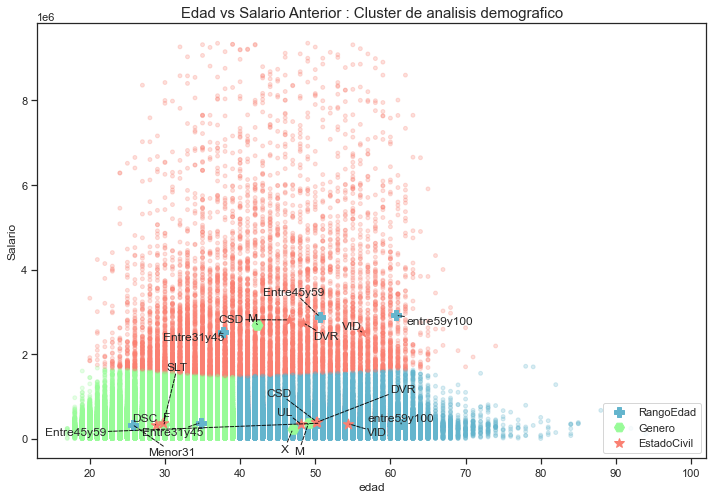

In [67]:
cluster_with_label_gp = edad_salario_cluster_df[(edad_salario_cluster_df['Represent_in_graph']==1) 
                          & ((edad_salario_cluster_df['Category'] == 'Genero')
                            | (edad_salario_cluster_df['Category'] == 'RangoEdad')
                            | (edad_salario_cluster_df['Category'] == 'EstadoCivil'))]
#print(cluster_with_label_gp )

#print(df_raw1[df_raw1.Desempleado_code==1][['edad','salario','Cluster']])
Create_kmeans_cluster_with_label(df_raw1[df_raw1.Desempleado_code==1][['edad','Salario','Cluster']]
                           ,cluster_with_label_gp.reset_index()
                           ,'edad'
                           ,'Salario'
                           ,"Edad vs Salario Anterior : Cluster de analisis demografico")

In [68]:
import sys 
!{sys.executable} --version

Python 3.8.5


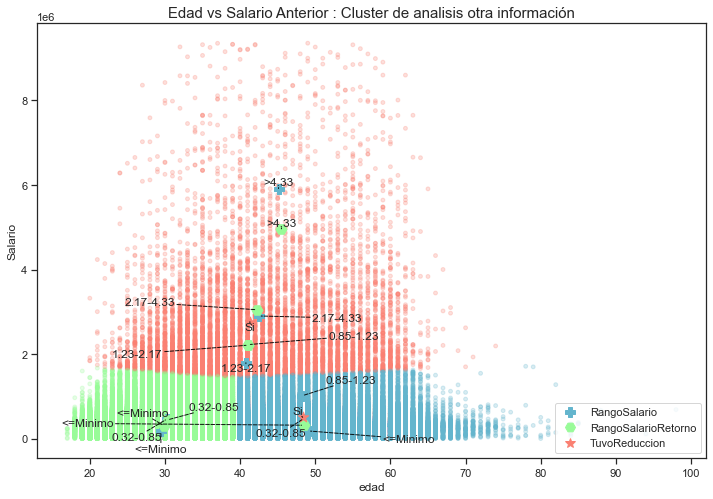

In [69]:
cluster_with_label_gp = edad_salario_cluster_df[(edad_salario_cluster_df['Represent_in_graph']==1) 
                          & ((edad_salario_cluster_df['Category'] == 'TuvoReduccion')
                           | (edad_salario_cluster_df['Category'] == 'RangoSalarioRetorno')
                           #| (edad_salario_cluster_df['Category'] == 'Diferenciabrechas')                          
                            | (edad_salario_cluster_df['Category'] == 'RangoSalario'))]
                           #| (edad_salario_cluster_df['Category'] == 'InactivoPostRetiro'))]
#print(cluster_with_label_gp )

#print(df_raw1[df_raw1.Desempleado_code==1][['edad','salario','Cluster']])
Create_kmeans_cluster_with_label(df_raw1[df_raw1.Desempleado_code==1][['edad','Salario','Cluster']]
                           ,cluster_with_label_gp.reset_index()
                           ,'edad'
                           ,'Salario'
                           ,"Edad vs Salario Anterior : Cluster de analisis otra información")

## 4. Churn customer prediction model

### Data preprocessing

In [70]:
df_raw2.head().T

,0,1,2,3,4
edad,71,64,64,63,63
RangoEdad,entre59y100,entre59y100,entre59y100,entre59y100,entre59y100
Genero,F,F,F,F,F
EstadoCivil,SLT,VID,VID,CSD,CSD
Salario,61400,1.3448e+06,717233,1.49417e+06,3.15207e+07
RangoSalario,1,4,2,4,6
HayAportes,2,1,0,2,1
SalarioPromedioRetorno,61400,717233,NaN,1.64318e+07,1.3429e+06
RangoSalarioRetorno,1,2,0,6,4
Brecha,0,2,2,-2,2


In [71]:
def Data_transformation_renaming(df):
    """ Cambiar el nombre de las columnas y transformarlos en el formato adecuado y devolver el marco de datos """
    df_cal = df.copy()
    
    df_cal['RangoSalario'] = df_cal.RangoSalario.map({0:'No',1:'<=Minimo',2:'0.32-0.85',3:'0.85-1.23',4:'1.23-2.17',5:'2.17-4.33',6:'>4.33'})
    df_cal['RangoSalarioRetorno'] = df_cal.RangoSalarioRetorno.map({0:'No',1:'<=Minimo',2:'0.32-0.85',3:'0.85-1.23',4:'1.23-2.17',5:'2.17-4.33',6:'>4.33'})
    #df_cal['RangoEdad'] = df_cal.RangoEdad.map({'Menor31':1,'Entre31y45':2,'Entre45y59':3,'entre59y100':4,'Mayor100':5}).astype(int)
    #df_cal['Genero'] = df_cal.Genero.map({'F':1,'M':2,'X':0}).astype(int)
    #df_cal['EstadoCivil'] = df_cal.EstadoCivil.map({'DSC':0,'SLT':1,'CSD':2,'DVR':3,'VID':4,'UL':5,'SPR':6}).astype(int) 
    df_cal['HayAportes'] = df_cal['HayAportes'].astype(int)
    df_cal['TuvoReduccion'] = df_cal['TuvoReduccion'].astype(int)
    df_cal['Pensionado'] = df_cal['Pensionado'].astype(int)
    df_cal['InactivoPostUltAporte'] = df_cal['InactivoPostUltAporte'].astype(int)
    df_cal['InactivoPostRetiro'] = df_cal['InactivoPostRetiro'].astype(int)
    #df_cal['RangoSalarioRetorno'] = df_cal['RangoSalarioRetorno'].astype(int)
    #df_cal['RangoSalario'] = df_cal['RangoSalario'].astype(int)
    df_cal['Desempleado'] = df_cal['Desempleado'].astype(int)
    df_cal['Brecha'] = df_cal['Brecha'].astype(int)
    #df_cal[df_cal['Brecha'] < 0] = 0
   
    # Data transformation
    
    # Converting TotalCharges into Numeric, but some of the records are empty, so first we need to deal with them.
    df_cal.loc[df_cal['SalarioPromedioRetorno']==' ','SalarioPromedioRetorno'] = np.nan
    
    # First we convert TotalCharges to float and then replace with tenure * monthly charges
    df_cal['SalarioPromedioRetorno'] = df_cal['SalarioPromedioRetorno'].astype('float64')
    df_cal.loc[df_cal['SalarioPromedioRetorno'].isnull()==True,'SalarioPromedioRetorno'] = df_cal['Salario'] #* df_cal['Tenure']
    
    return df_cal    

In [72]:
# Aqui hay qu normalizar el modelo.
df_model = Data_transformation_renaming(df_raw2)
df_model.head()

,edad,RangoEdad,Genero,EstadoCivil,Salario,RangoSalario,HayAportes,SalarioPromedioRetorno,RangoSalarioRetorno,Brecha,InactivoPostRetiro,InactivoPostUltAporte,Pensionado,TuvoReduccion,Desempleado
0,71.0,entre59y100,F,SLT,61400.00,<=Minimo,2,61400.00,<=Minimo,0,0,2,0,0,1
1,64.0,entre59y100,F,VID,1344800.00,1.23-2.17,1,717233.33,0.32-0.85,2,0,8,0,1,1
2,64.0,entre59y100,F,VID,717233.33,0.32-0.85,0,717233.33,No,2,8,8,0,0,1
3,63.0,entre59y100,F,CSD,1494166.67,1.23-2.17,2,16431816.67,>4.33,-2,1,0,0,0,1
4,63.0,entre59y100,F,CSD,31520733.33,>4.33,1,1342900.00,1.23-2.17,2,3,0,0,1,1


In [73]:

df_model.groupby('Brecha').count()

,edad,RangoEdad,Genero,EstadoCivil,Salario,RangoSalario,HayAportes,SalarioPromedioRetorno,RangoSalarioRetorno,InactivoPostRetiro,InactivoPostUltAporte,Pensionado,TuvoReduccion,Desempleado
Brecha,,,,,,,,,,,,,,
-5,61,61,61,61,61,61,61,61,61,61,61,61,61,61
-4,260,260,260,260,260,260,260,260,260,260,260,260,260,260
-3,969,969,969,969,969,969,969,969,969,969,969,969,969,969
-2,3037,3037,3037,3037,3037,3037,3037,3037,3037,3037,3037,3037,3037,3037
-1,38236,38236,38236,38236,38236,38236,38236,38236,38236,38236,38236,38236,38236,38236
0,157333,157333,157333,157333,157333,157333,157333,157333,157333,157333,157333,157333,157333,157333
1,154162,154162,154162,154162,154162,154162,154162,154162,154162,154162,154162,154162,154162,154162
2,58378,58378,58378,58378,58378,58378,58378,58378,58378,58378,58378,58378,58378,58378
3,6124,6124,6124,6124,6124,6124,6124,6124,6124,6124,6124,6124,6124,6124


#### Train & Test data split

In [74]:
def Shuffle_data(df):
    """ Return shuffled data based on rows """
    return shuffle(df).reset_index().drop('index'
                                          , axis = 1)

def One_hot_encoding(df,feature):
    """ Apply one hot encoding to given features """
    return pd.concat([df
                      , pd.get_dummies(df[feature])]
                     , axis = 1)

def Merge_df(data, features):
    """ Return merge dataframe with given features"""
    merged_df = pd.DataFrame()
    for feature in features:
        merged_df = pd.concat([merged_df, data[feature]]
                              , axis = 1)
    return merged_df

def Normalize_df(data, cols):
    """ Normalize features """
    for col in cols:
        data[col] = Normalize_feature(data[[col]])
        
    return data    

def Create_model_df(df, col_cols, nom_cols, binary_cols, num_cols, target_col):
    """ Preparing data for modelling """
    
    df_model = Merge_df(df , [col_cols, num_cols, target_col])
    df_model = Shuffle_data(df_model)
    df_model = One_hot_encoding(df_model, nom_cols)
    
    df_model.drop(nom_cols, axis = 1, inplace = True)
    
    df_model = Normalize_df(df_model, num_cols)
    
    return (df_model.loc[:, ~df_model.columns.isin(target_col)]
            , df_model[target_col].values.flatten())


def Train_test_df(feature, target, test_size):
    """ Spliting data to train and test"""
    return train_test_split(feature
                     ,target
                     ,test_size= test_size
                     ,random_state= random_state)

In [75]:
'''
cat_cols = ["RangoEdad","Genero","EstadoCivil","RangoSalario","RangoSalarioRetorno","Pensionado","TuvoReduccion"]
num_cols = ["HayAportes","Brecha","InactivoPostUltAporte","InactivoPostRetiro"]
target_col = 'Desempleado'

# spliting categorical columns into Nominal and Binary columns
#nominal_cols = ["RangoEdad","Genero","EstadoCivil","RangoSalario","RangoSalarioRetorno","HayAportes",
#                 "Brecha","InactivoPostUltAporte","InactivoPostRetiro"]

nominal_cols = ["RangoEdad","Genero","EstadoCivil","RangoSalario","RangoSalarioRetorno"]
binary_cols = ["Pensionado","TuvoReduccion"]
monto_cols = ["Salario","SalarioPromedioRetorno"]
'''

'\ncat_cols = ["RangoEdad","Genero","EstadoCivil","RangoSalario","RangoSalarioRetorno","Pensionado","TuvoReduccion"]\nnum_cols = ["HayAportes","Brecha","InactivoPostUltAporte","InactivoPostRetiro"]\ntarget_col = \'Desempleado\'\n\n# spliting categorical columns into Nominal and Binary columns\n#nominal_cols = ["RangoEdad","Genero","EstadoCivil","RangoSalario","RangoSalarioRetorno","HayAportes",\n#                 "Brecha","InactivoPostUltAporte","InactivoPostRetiro"]\n\nnominal_cols = ["RangoEdad","Genero","EstadoCivil","RangoSalario","RangoSalarioRetorno"]\nbinary_cols = ["Pensionado","TuvoReduccion"]\nmonto_cols = ["Salario","SalarioPromedioRetorno"]\n'

In [76]:
df_model_feature ,df_model_target = Create_model_df(df_model
                                                    , cat_cols
                                                    , nominal_cols
                                                    , binary_cols
                                                    , num_cols
                                                    , [target_col])

x_train, x_test, y_train, y_test = Train_test_df(df_model_feature
                                                 , df_model_target
                                                 , test_size = 0.2)


print("----------------------------")
print("Original features shape, ", df_model_feature.shape)
print("Original target shape, ", df_model_target.shape)
print("x train shape, ", x_train.shape)
print("y train shape, ", y_train.shape)
print("x test shape, ", x_test.shape)
print("y test shape, ", y_test.shape)
print("----------------------------")

----------------------------
Original features shape,  (424865, 32)
Original target shape,  (424865,)
x train shape,  (339892, 32)
y train shape,  (339892,)
x test shape,  (84973, 32)
y test shape,  (84973,)
----------------------------


#### Class imbalance

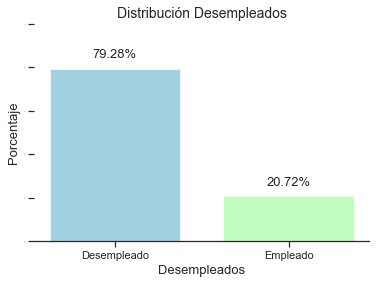

In [77]:
# Distribution in train dataset

Tasa_Desempleados = pd.value_counts(y_train) / len(y_train)
Generate_bar_graph(Tasa_Desempleados.index.map({0:'Empleado',1:"Desempleado"})
                   , Tasa_Desempleados.values
                   , 'Desempleados'
                   , 'Porcentaje'
                   , 'Distribución Desempleados')

Aquí, nuestro modelo de entrenamiento tiene un problema de desequilibrio de clases debido a la desigualdad en la distribución de datos. 

#### Se hara Upsampling de los datos de entrenamiento (train)

In [78]:
# Upsampling usando SMOTE
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = random_state) #, ratio = 1.0)
x_train_sm , y_train_sm = sm.fit_resample(x_train,y_train)

print("----------------------------")
print("Original x train shape, ", x_train.shape)
print("Resample x train shape, ", x_train_sm.shape)
print("----------------------------")

----------------------------
Original x train shape,  (339892, 32)
Resample x train shape,  (538920, 32)
----------------------------


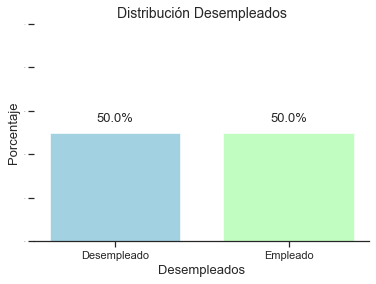

In [79]:
# Despues upsampling la nueva distribución del dataset de entrenamiento

Tasa_Desempleados = pd.value_counts(y_train_sm) / len(y_train_sm)
Generate_bar_graph(Tasa_Desempleados.index.map({0:'Empleado',1:"Desempleado"})
                   , Tasa_Desempleados.values
                   , 'Desempleados'
                   , 'Porcentaje'
                   , 'Distribución Desempleados')

#### Desarrollo del Modelo

Aquí, usaré modelos de regresión logística, Random forest y aumento de gradiente(**Gradient boosting**) para predecir desempleados y comparar qué modelo funciona mejor para nuestro conjunto de datos. Además, analizare el conjunto de datos original y los datos de muestreo superior para todos estos modelos.

## Ajuste de hiperparametros (Hyperparameter Tunning)

Based on original and Upsampling data, tunned hyperparameter for our traing data for all three models.

Basado en datos originales y de Upsampling, ajustamos los hiperparámetros para nuestros datos de entrenamiento para los tres modelos.

In [85]:
def Parameter_tunning(x, y, models, clsModelsNm, parameters, score):
    
    tuned_params = {}
    for i,model in enumerate(models):
        print(clsModelsNm[i])
        if clsModelsNm[i] == "Logistic Regression":
            ## Se cambiaron porque daba error con los parametros anteriores
            solver_options = ['newton-cg', 'liblinear', 'sag']  ## Le quite esta 'lbfgs',
            multi_class_options = ['ovr', 'multinomial']
            class_weight_options = ['None', 'balanced']

            param_grid_RL = dict(solver = solver_options, multi_class = 
            multi_class_options, class_weight = class_weight_options)

            grid = GridSearchCV(estimator = model 
                            , cv = 5
                            , param_grid = param_grid_RL  ####parameters[clsModelsNm[i]]
                            , scoring = score
                            , n_jobs = 3
                           )            
            
        else:
            grid = GridSearchCV(estimator = model 
                            , cv = 5
                            , param_grid = parameters[clsModelsNm[i]]
                            , scoring = score
                            , n_jobs = 3
                           )
        grid.fit(x,y)
        print(grid.best_score_)
        print(grid.best_params_)
        tuned_params[clsModelsNm[i]] = {'params':grid.best_params_}
    
    return tuned_params

In [86]:
clsModelsNm = ["Logistic Regression", "Random Forest", "Gradient boosting"]
#clsModelsNm = ["Random Forest", "Gradient boosting"]
scoreMatrix = ['accuracy','precision','recall','f1','neg_log_loss']
'''
clsParams = {'Random Forest': {'max_depth':[3,5,7,10,15,20]
                                ,'n_estimators':[100,150,200]
                                ,'max_features':['auto',0.7,0.2]
                                ,'min_samples_leaf':[1,5,10,15,20]
                                 }
             , 'Gradient boosting': {'learning_rate': [0.05, 0.1, 0.2]
                                    ,'n_estimators':[10,50,100,150,200]
                                    ,'max_depth':[3,5,7]
                                    ,'min_samples_split':[0.1, 0.5, 1.0]
                                    ,'min_samples_leaf':[1, 5, 10, 15, 20]
                                    ,'subsample': [0.1, 0.5, 0.7 , 1]
                                    }
            }

'''
clsParams = {'Logistic Regression':{'C':[0.1, 0.5, 1, 5, 10, 15, 20, 100] 
                                   ,'penalty':['l1','l2']
                                    }
             , 'Random Forest': {'max_depth':[3,5,7,10,15,20]
                                ,'n_estimators':[100,150,200]
                                ,'max_features':['auto',0.7,0.2]
                                ,'min_samples_leaf':[1,5,10,15,20]
                                 }
             , 'Gradient boosting': {'learning_rate': [0.05, 0.1, 0.2]
                                    ,'n_estimators':[10,50,100,150,200]
                                    ,'max_depth':[3,5,7]
                                    ,'min_samples_split':[0.1, 0.5, 1.0]
                                    ,'min_samples_leaf':[1, 5, 10, 15, 20]
                                    ,'subsample': [0.1, 0.5, 0.7 , 1]
                                    }
            }            

In [ ]:
clsLR = LogisticRegression(random_state = random_state)
clsRF = RandomForestClassifier(random_state = random_state)
clsGB = GradientBoostingClassifier(random_state = random_state)

clsModels = [clsLR, clsRF, clsGB]
#clsModels = [clsRF, clsGB]

tuned_params = Parameter_tunning(x_train, y_train, clsModels, clsModelsNm, clsParams, 'neg_log_loss')

Logistic Regression


D:\Personal\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [-0.00127424         nan -0.0012788          nan         nan         nan
 -0.00132124 -0.00184337 -0.00132628 -0.00073085         nan -0.0007333 ]
  warnings.warn(


-0.0007308519665724806
{'class_weight': 'balanced', 'multi_class': 'multinomial', 'solver': 'newton-cg'}
Random Forest
-1.3775700553168742e-07
{'max_depth': 15, 'max_features': 0.7, 'min_samples_leaf': 1, 'n_estimators': 150}
Gradient boosting


In [ ]:
#### Upsampling data

In [ ]:
clsLR_sm = LogisticRegression(random_state = random_state)
clsRF_sm = RandomForestClassifier(random_state = random_state)
clsGB_sm = GradientBoostingClassifier(random_state = random_state)

clsModels_sm = [clsLR_sm, clsRF_sm, clsGB_sm]

tuned_params_sm = Parameter_tunning(x_train_sm, y_train_sm, clsModels_sm, clsModelsNm, clsParams , 'neg_log_loss')

### Model Comparision

During hyperparameter tunning process, I got best parameters for each models. using these parameter and corss_val_score method, 
I have compared different metrics and try to find best threshold value with lower log loss score.

Intuition process -

Because target variable is binary value, log loss would be better metrics to find uncertainity of the model. Once I'll explore a better model wih lower log loss score, then I'll tune threshold to improve F1/Recall/Precision score.

In [ ]:
# Graph of precision & recall against threshold
def plot_precision_recall_vs_thresold(precisions, recalls, thresholds):
    plt.plot(thresholds,precisions[:-1],label="Precision")
    plt.plot(thresholds,recalls[:-1],label="Recall")
    plt.plot(thresholds,2 * (precisions[:-1] * recalls[:-1]) / (precisions[:-1]+recalls[:-1]) ,label="F1")
    plt.title("Precision, recall & F1 vs thresold")
    plt.xlabel("Thresold")
    plt.legend(loc='lower right')
    plt.show()

In [ ]:
def Cross_validation_score(clsModels, clsModelsNm, clsSample, scoreMatrix):
    """ Cross validation using cross_val_score method """
    for i,model in enumerate(clsModels):
        print("===============================================")
        print(clsModelsNm[i])

        for j, sample in enumerate(clsSample):
            print("************************************************")
            print(sample[2])
            
            for score in scoreMatrix:
                scores = cross_val_score(model, sample[0], sample[1], cv=5 , scoring = score)
                print(score, " score:", scores.mean())
                
            y_scores = cross_val_predict(model, sample[0], sample[1], cv=5, method="predict_proba") 
            
            
            precisions, recalls, thresholds = metrics.precision_recall_curve(sample[1], y_scores[:][:,1]) 
            plot_precision_recall_vs_thresold(precisions, recalls, thresholds)
            score_matrix = pd.DataFrame({'Precisions': precisions[:-1]
                                ,'Recalls': recalls[:-1]
                                ,'F1': 2 * (precisions[:-1] * recalls[:-1]) / (precisions[:-1]+recalls[:-1])
                                ,'Threshold': thresholds
                               })
            #print("When percision and recall are same \n" , score_matrix[ score_matrix['Precisions'] == score_matrix['Recalls']] )
            print("When F1 score is max \n" , score_matrix[ score_matrix['F1'] == max(score_matrix['F1'])] )

#### Original data

In [ ]:
# Original data

clsLR = LogisticRegression(random_state = random_state
                           , C = 0.5
                           , penalty = 'l2')

clsRF = RandomForestClassifier(random_state = random_state
                              ,max_depth = 15
                              ,max_features = 'auto'
                              ,min_samples_leaf = 10
                              ,n_estimators = 150 )

                        
clsGB = GradientBoostingClassifier(random_state = random_state
                              , max_depth = 5
                              , n_estimators = 150
                              , learning_rate = 0.05
                              , min_samples_leaf = 20 
                              , min_samples_split = 0.1
                              , subsample = 0.7)


clsModels = [clsLR, clsRF, clsGB]

Cross_validation_score(clsModels, clsModelsNm, [(x_train, y_train,'Original data')], scoreMatrix)

### Upsampling data

In [ ]:
# resample data


clsLR_sm = LogisticRegression(random_state = random_state
                           , C = 0.5
                           , penalty = 'l1')

clsRF_sm = RandomForestClassifier(random_state = random_state
                               , max_depth = 20
                              , n_estimators = 200
                              , max_features = 'auto'
                              , min_samples_leaf = 1 )

clsGB_sm = GradientBoostingClassifier(random_state = random_state
                              , max_depth = 5
                              , n_estimators = 100
                              , learning_rate = 0.2
                              , min_samples_leaf = 10 
                              , min_samples_split = 0.1
                              , subsample = 1)
                        
clsModels_sm = [clsLR_sm, clsRF_sm, clsGB_sm]

Cross_validation_score(clsModels_sm, clsModelsNm, [(x_train_sm, y_train_sm,'Upsampled data')], scoreMatrix)

Using these threshold values, now we will tune our model and evaluate it on testing dataset.

### Model Evaluation

Up till now, I was working on training dataset to train model. Let's checked how models are performing on unseen dataset (testing).

In [ ]:
def Cus_log_loss(target, predicted):
    if len(predicted) != len(target):
        print("Data object initiated")
        return
    
    target = [float(x) for x in target] # converting target into float
    predicted = [min([max([x,1e-15]), 1-1e-15]) for x in predicted]
        
    return -1.0 / len(target) *  sum([ target[i] * math.log(predicted[i]) + (1.0 - target[i]) * math.log(1.0 - predicted[i]) 
                                      for i in range(len(predicted))])

In [ ]:

def Model_evaluation(models, clsModelsNm, x_train, y_train, x_test, y_test,  threshold ):
    
    predicted_val = {}
    for i, model in enumerate(clsModelsNm):
        models[i].fit(x_train,y_train)
        predicted_proba = models[i].predict_proba(x_test)
        
        predicted = predicted_proba[:,1].copy()
        predicted[predicted >=threshold[i]] = 1
        predicted[predicted < threshold[i]] = 0
        
        confusion_matrix_matrix = metrics.confusion_matrix(y_true = y_test
                                                   ,y_pred = predicted
                                                   #,normalize = 'true' 
                                                   )
        
        print("***********",clsModelsNm[i], "*************")
        print(metrics.classification_report(y_test, predicted))
        print("*******************************************")
        #print("Log loss score", round(metrics.log_loss(y_test,models[i].predict_proba(x_test)[:,1]),2))
        print("Log loss score", round(Cus_log_loss(y_test,predicted_proba[:,1]),2))
        print("*******************************************")
        print("Confusion matrix")
        sns.heatmap(confusion_matrix_matrix
                    , annot=True
                    , fmt="d"
                   )
        plt.xlabel("Predicted label")
        plt.ylabel("Actual label")
        plt.show()
        print("*******************************************")
        
        predicted_val[model] = predicted

### Original data

In [ ]:
Logistic_threshold = 0.31
Random_forest_threshold = 0.30
Gradient_boosting_threshold = 0.30

Model_evaluation(clsModels
                 , clsModelsNm
                 , x_train
                 , y_train
                 , x_test
                 , y_test
                 , [Logistic_threshold
                    ,Random_forest_threshold
                    , Gradient_boosting_threshold  ] )

### Upsampling data

In [ ]:
Logistic_threshold_sm = 0.37
Random_forest_threshold_sm = 0.46
Gradient_boosting_threshold_sm = 0.45

Model_evaluation(clsModels_sm
                 , clsModelsNm
                 , x_train_sm
                 , y_train_sm
                 , x_test
                 , y_test
                 , [Logistic_threshold_sm
                    ,Random_forest_threshold_sm
                    , Gradient_boosting_threshold_sm  ] )

### Model conclusion

Based on model comparision and evaluation process, upsampling data works better during training process, however not with unseen data (based on log loss score). One of the reason could be data leakage in corss_val_score step.

However, log loss score for original dataset remains same with training dataset as well as testing dataset.

From above analysis, gradient boosting with original dataset has stable and best score. So, for prediction process I have used it.

### Feature importance

In [ ]:
feature_importance = pd.Series(clsGB.feature_importances_, x_train.columns)
plt.figure(figsize = (10,8))
feature_importance.sort_values().plot(kind = 'barh')
plt.xlabel("Importance", fontsize = 13)
plt.ylabel("Features", fontsize = 13)
plt.title("Feature importance", fontsize = 14)

Based on feature importance graph, it tells that Totalcharges, Tenure, Monthly charges , Contract type, Payment method, Internet sevice type, PaperlessBilling are some important features to predict churn customers.

In [ ]:
churn_customer_prob = pd.DataFrame({'Predicted_proba': clsGB.predict_proba(x_test)[:][:,1]
                                   , 'predicted': clsGB.predict(x_test)})
churn_customer_prob

### 5. Retention plan

Prediction on Existing Customer

Since we generated a model based on Churn and Existing customers, which help to classify both of them. Now we can use same model on existing customers to find the probability of churn.

In [ ]:
existing_cust = df_model[df_model['Churn']==0]
existing_cust_feature ,existing_cust_target = Create_model_df(df_model[df_model['Churn']==0]
                                                    , cat_cols
                                                    , nominal_cols
                                                    , binary_cols
                                                    , num_cols
                                                    , [target_col])

In [ ]:
existing_customer_churn_prob = clsGB.predict_proba(existing_cust_feature)

In [ ]:
existing_cust['Churn_proba'] = existing_customer_churn_prob[:][:,1]

In [ ]:
plt.hist(existing_cust['Churn_proba']
         , bins = 10)

plt.xlabel("Probability of Churn", fontsize=13)
plt.ylabel("Customers", fontsize=13)
plt.title("Existing customers' Churn probability distribution", fontsize=14)

Define existing customers based on probability of churn;

In [ ]:
existing_cust.loc[existing_cust['Churn_proba'] >= 0.8 , 'Risk_type'] = 'Very high'
existing_cust.loc[(existing_cust['Churn_proba'] >= 0.6) & (existing_cust['Churn_proba'] < 0.8)  , 'Risk_type'] = 'High'
existing_cust.loc[(existing_cust['Churn_proba'] >= 0.4) & (existing_cust['Churn_proba'] < 0.6) , 'Risk_type'] = 'Medium'
existing_cust.loc[(existing_cust['Churn_proba'] >= 0.2) & (existing_cust['Churn_proba'] < 0.4) , 'Risk_type'] = 'Low'
existing_cust.loc[(existing_cust['Churn_proba'] > 0.0) & (existing_cust['Churn_proba'] < 0.2) , 'Risk_type'] = 'Very low'

In [ ]:
existing_cust['Risk_type'].value_counts()

In [ ]:
existing_cust['Risk_type'].value_counts().plot(kind = 'barh')
plt.title("Existing customer risk type distribution", fontsize=14)
plt.ylabel("Risk type", fontsize = 13)
plt.xlabel("Customers", fontsize = 13)

We can provide retension plans to high risk and very high risk type customers.

## Conclusion

In this notebook, I have tried to divide customer churn prediction problem into steps like exploration, profiling, clustering, model selection & evaluation and retention plans. Based on this analysis, we can help retention team to analyze high risk churn customers before they leave the company.

Moreover, we can add different datasources like customer inquires, seasonality in sales, more demographic information to make our prediction accurate.